# 🃏 CNN zur Spielkarten-Klassifikation
## Ein didaktisches Beispielprojekt für Einsteiger

---

### Was wirst du in diesem Notebook lernen?

Dieses Notebook führt dich Schritt für Schritt durch die Implementierung eines **Convolutional Neural Networks (CNN)** zur **Bildklassifikation von Spielkarten**. Am Ende wirst du verstehen:

1. **Was ist ein Neuronales Netz?** - Die Grundlagen von künstlichen Neuronen, Gewichten und Aktivierungsfunktionen
2. **Was ist ein CNN?** - Warum Faltungsnetzwerke besonders gut für Bilder geeignet sind
3. **Die CNN-Architektur:** - Convolution Layer, Pooling Layer, Dense Layer und wie sie zusammenarbeiten
4. **Training eines CNNs:** - Wie das Netzwerk durch Backpropagation lernt
5. **Evaluation:** - Wie wir die Leistung unseres Modells messen

---

### Theoretischer Hintergrund: Was ist ein Neuronales Netz?

Ein **künstliches neuronales Netz** ist ein mathematisches Modell, das sich an der Funktionsweise des menschlichen Gehirns orientiert. Es besteht aus:

- **Neuronen (Knoten):** Verarbeitungseinheiten, die Eingaben empfangen und Ausgaben produzieren
- **Gewichte (Weights):** Zahlen, die die Stärke der Verbindung zwischen Neuronen bestimmen
- **Aktivierungsfunktionen:** Funktionen, die bestimmen, ob ein Neuron "feuert" oder nicht

**Wie lernt ein neuronales Netz?**
1. **Forward Pass:** Eingabe wird durch das Netzwerk geschickt → Vorhersage entsteht
2. **Loss-Berechnung:** Wie weit liegt die Vorhersage vom wahren Wert entfernt?
3. **Backpropagation:** Der Fehler wird rückwärts durch das Netz propagiert
4. **Gewichtsanpassung:** Die Gewichte werden angepasst, um den Fehler zu minimieren

---

### Was ist ein Convolutional Neural Network (CNN)?

Ein **CNN** ist eine spezielle Art von neuronalem Netz, das besonders gut für **Bilddaten** geeignet ist. Der Grund:

- **Faltung (Convolution):** Erkennt lokale Muster wie Kanten, Ecken, Texturen
- **Translation Invarianz:** Erkennt Objekte unabhängig von ihrer Position im Bild
- **Parametereffizient:** Teilt Gewichte, braucht weniger Parameter als voll verbundene Netze

**Typischer CNN-Aufbau (wie in der Vorlesung):**

```
Eingabe → [Convolution → ReLU → Pooling] × n → Flatten → Dense → Softmax → Ausgabe
```

Wir werden genau diese Architektur implementieren!

## 1. Bibliotheken importieren und Umgebung prüfen

Bevor wir beginnen, müssen wir die notwendigen Bibliotheken importieren. 

**Benötigte Bibliotheken:**
- `tensorflow` / `keras`: Das Deep-Learning-Framework zum Erstellen und Trainieren des CNNs
- `numpy`: Für numerische Berechnungen mit Arrays
- `matplotlib`: Zum Visualisieren von Bildern und Trainingsverläufen
- `kagglehub`: Zum Herunterladen des Spielkarten-Datensatzes von Kaggle
- `scikit-learn`: Für Metriken wie die Confusion Matrix

**Installation (falls noch nicht geschehen):**
```bash
pip install tensorflow kagglehub matplotlib scikit-learn numpy pillow
```

Für macOS mit Apple Silicon (M1/M2/M3):
```bash
pip install tensorflow-macos tensorflow-metal kagglehub matplotlib scikit-learn numpy pillow
```

In [39]:
# ==============================================================================
# 1. BIBLIOTHEKEN IMPORTIEREN
# ==============================================================================
# In diesem Abschnitt laden wir alle Python-Bibliotheken, die wir für unser
# CNN-Projekt benötigen. Jede Bibliothek hat eine spezifische Aufgabe.
# ==============================================================================

# --- Hinweis zur Installation ---
# Falls eine der folgenden Bibliotheken nicht installiert ist, führe in der
# Konsole folgenden Befehl aus:
 # pip install tensorflow matplotlib scikit-learn numpy pillow seaborn
#
# Für macOS mit Apple Silicon (M1/M2/M3) verwende stattdessen:
# pip install tensorflow-macos tensorflow-metal matplotlib scikit-learn numpy pillow seaborn

# --- Standard-Bibliotheken (in Python bereits enthalten) ---
import os                  # Für Dateisystem-Operationen (Ordner durchsuchen, Pfade bauen)
import random              # Für zufällige Auswahl (z.B. Beispielbilder)
import subprocess          # Für das Ausführen von Shell-Befehlen (curl)
import zipfile             # Für das Entpacken von ZIP-Archiven
import shutil              # Für Dateioperationen (kopieren, verschieben)
import re                  # Regular Expressions für Textmuster

# --- TensorFlow / Keras ---
# TensorFlow ist ein Open-Source-Framework für Machine Learning von Google.
# Keras ist eine High-Level-API innerhalb von TensorFlow, die das Erstellen
# von neuronalen Netzen sehr einfach macht. Wir verwenden Keras, weil es
# für Einsteiger besonders gut lesbar und verständlich ist.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential  # Für sequentielle Modelle

# --- NumPy ---
# NumPy ist DIE Bibliothek für numerische Berechnungen in Python.
# Bilder werden intern als NumPy-Arrays (mehrdimensionale Matrizen) dargestellt.
import numpy as np

# --- Matplotlib ---
# Matplotlib ist die Standard-Bibliothek zum Erstellen von Grafiken und Plots.
# Wir nutzen sie, um Bilder anzuzeigen und den Trainingsverlauf zu visualisieren.
import matplotlib.pyplot as plt

# --- Scikit-learn (sklearn) ---
# Scikit-learn bietet viele nützliche Funktionen für Machine Learning.
# Wir nutzen es hier für die Confusion Matrix zur Evaluation.
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns  # Für schönere Confusion-Matrix-Visualisierung

# ==============================================================================
# PROJEKTPFADE DEFINIEREN (RELATIVE PFADE!)
# ==============================================================================
# Wir verwenden relative Pfade, damit das Projekt auf jedem System läuft.
# Alle Daten werden im ./data/ Ordner gespeichert.
# ==============================================================================

DATA_DIR = "./data"                                          # Hauptordner für alle Daten
DATASET_ZIP = os.path.join(DATA_DIR, "playing-cards.zip")    # ZIP-Datei
DATASET_DIR = os.path.join(DATA_DIR, "playing-cards")        # Entpackter Datensatz

print("=" * 60)
print("Alle Bibliotheken erfolgreich importiert!")
print("=" * 60)
print(f"\n📁 Projektpfade (relativ):")
print(f"   Daten-Ordner:    {DATA_DIR}")
print(f"   ZIP-Datei:       {DATASET_ZIP}")
print(f"   Dataset-Ordner:  {DATASET_DIR}")
print("=" * 60)

Alle Bibliotheken erfolgreich importiert!

📁 Projektpfade (relativ):
   Daten-Ordner:    ./data
   ZIP-Datei:       ./data/playing-cards.zip
   Dataset-Ordner:  ./data/playing-cards


In [40]:
# ==============================================================================
# 1.1 UMGEBUNG PRÜFEN: TensorFlow-Version und GPU-Verfügbarkeit
# ==============================================================================
# Bevor wir beginnen, prüfen wir unsere Umgebung:
# - Welche TensorFlow-Version ist installiert?
# - Ist eine GPU verfügbar? (GPUs beschleunigen das Training erheblich)
#
# Was ist eine GPU?
# Eine GPU (Graphics Processing Unit) ist ein Prozessor, der ursprünglich für
# Grafikberechnungen entwickelt wurde. Da Deep Learning viele parallele Matrix-
# operationen erfordert, sind GPUs dafür ideal. Training auf GPU kann 10-100x
# schneller sein als auf CPU!
# ==============================================================================

print("=" * 60)
print("UMGEBUNGS-CHECK")
print("=" * 60)

# TensorFlow-Version anzeigen
print(f"TensorFlow Version: {tf.__version__}")

# Prüfen, ob GPUs verfügbar sind
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU gefunden: {len(gpus)} GPU(s) verfügbar")
    for gpu in gpus:
        print(f"   - {gpu}")
    print("   Das Training wird auf der GPU ausgeführt (schneller!)")
else:
    print("⚠️ Keine GPU gefunden - Training läuft auf CPU")
    print("   Das ist völlig okay, dauert nur etwas länger.")

# Keras-Backend anzeigen
print(f"Keras Backend: {keras.backend.backend()}")
print("=" * 60)

UMGEBUNGS-CHECK
TensorFlow Version: 2.20.0
⚠️ Keine GPU gefunden - Training läuft auf CPU
   Das ist völlig okay, dauert nur etwas länger.
Keras Backend: tensorflow


## 2. Datensatz von Kaggle herunterladen

Wir verwenden den **"Complete Playing Card Dataset"** von Kaggle. Dieser Datensatz enthält Bilder von 53 verschiedenen Spielkarten (52 Standard-Karten + Joker).

**Was ist Kaggle?**
Kaggle ist eine Plattform für Data Science und Machine Learning. Dort findest du:
- Tausende von Datensätzen (kostenlos!)
- Wettbewerbe mit Preisgeldern
- Notebooks und Tutorials

**Über den Datensatz:**
- **Anzahl Klassen:** 53 (z.B. "ace_of_spades", "king_of_hearts", "joker")
- **Bilder pro Klasse:** ca. 50-100 Bilder
- **Format:** JPG/PNG Bilder in Unterordnern nach Kartentyp sortiert

In [41]:
# ==============================================================================
# 2. DATENSATZ MIT CURL HERUNTERLADEN
# ==============================================================================
# Wir laden den Spielkarten-Datensatz direkt von Kaggle mit curl herunter.
# Das funktioniert ohne zusätzliche Abhängigkeiten und speichert die Daten
# im ./data/ Ordner - so bleibt alles im Projekt zusammen!
#
# VORTEILE:
# - Keine Kaggle-Credentials erforderlich (öffentlicher Download)
# - Relative Pfade = funktioniert auf jedem System
# - Daten im Projekt = einfach zu verwalten
# ==============================================================================

print("=" * 60)
print("DATENSATZ HERUNTERLADEN")
print("=" * 60)

# --- Ordner erstellen falls nicht vorhanden ---
os.makedirs(DATA_DIR, exist_ok=True)

# --- Prüfen ob Daten schon vorhanden ---
bilder_pfad = os.path.join(DATASET_DIR, "Images", "Images")
if os.path.exists(bilder_pfad) and os.listdir(bilder_pfad):
    print(f"✅ Datensatz bereits vorhanden in: {DATASET_DIR}")
    print(f"   Bilder gefunden: {len(os.listdir(bilder_pfad))}")
    print("   Überspringe Download...")
else:
    # --- ZIP herunterladen falls nicht vorhanden ---
    if not os.path.exists(DATASET_ZIP):
        print("📥 Lade Datensatz von Kaggle herunter...")
        print("   (Das kann einige Minuten dauern)\n")
        
        # curl-Befehl ausführen
        curl_command = [
            "curl", "-L", "--progress-bar",
            "-o", DATASET_ZIP,
            "https://www.kaggle.com/api/v1/datasets/download/jaypradipshah/the-complete-playing-card-dataset"
        ]
        
        result = subprocess.run(curl_command)
        
        if result.returncode != 0:
            raise Exception("Download fehlgeschlagen! Prüfe deine Internetverbindung.")
        
        print(f"\n✅ Download abgeschlossen: {DATASET_ZIP}")
    else:
        print(f"✅ ZIP-Datei bereits vorhanden: {DATASET_ZIP}")
    
    # --- ZIP entpacken ---
    print(f"\n📦 Entpacke ZIP-Datei nach {DATASET_DIR}...")
    os.makedirs(DATASET_DIR, exist_ok=True)
    
    with zipfile.ZipFile(DATASET_ZIP, 'r') as zip_ref:
        zip_ref.extractall(DATASET_DIR)
    
    print("✅ Entpacken abgeschlossen!")

print(f"\n📁 Datensatz-Pfad: {DATASET_DIR}")
print("=" * 60)

DATENSATZ HERUNTERLADEN
📥 Lade Datensatz von Kaggle herunter...
   (Das kann einige Minuten dauern)



######################################################################## 100.0%                                                         12.2%                                                         12.2%                                               21.3%                                               21.3%#######                                                  34.2%#######                                                  34.2%###########################                                59.4%###########################                                59.4%##############################                              62.5%##############################                              62.5%#####################################                       71.2%#####################################                       71.2%#######################################                     73.9%#######################################                     73.9%######################################             


✅ Download abgeschlossen: ./data/playing-cards.zip

📦 Entpacke ZIP-Datei nach ./data/playing-cards...
✅ Entpacken abgeschlossen!

📁 Datensatz-Pfad: ./data/playing-cards
✅ Entpacken abgeschlossen!

📁 Datensatz-Pfad: ./data/playing-cards


## 3. Datensatz erkunden: Ordnerstruktur verstehen

Bevor wir mit dem Training beginnen, sollten wir verstehen, wie der Datensatz organisiert ist.

### Die Struktur dieses Datensatzes

```
the-complete-playing-card-dataset/
│
├── 📁 Images/Images/        ← 🖼️ HIER SIND UNSERE BILDER!
│       ├── 10C0.jpg             Alle ~2650 Bilder in EINEM Ordner
│       ├── AC0.jpg              Dateiname = Klasse + Bildnummer
│       └── ...
│
├── 📁 Annotations/          ← ❌ Pascal VOC Format (ignorieren wir)
├── 📁 YOLO_Annotations/     ← ❌ YOLO Format (ignorieren wir)
└── 📄 annotation.json       ← ❌ COCO Format (ignorieren wir)
```

**Hinweis zu den Annotations-Ordnern:**
Dieser Datensatz wurde für **Object Detection** erstellt (Karten in Bildern lokalisieren).
Die Annotations enthalten Bounding Boxes - wir brauchen sie **nicht** für Klassifikation!

### Wir machen KLASSIFIKATION:
- **Object Detection:** "Wo ist die Karte?" → Braucht Bounding Boxes
- **Klassifikation:** "Welche Karte ist das?" → Braucht nur Labels (aus Dateinamen)

### Dateinamen-Schema

| Dateiname | Klasse | Bedeutung |
|-----------|--------|-----------|
| `10C0.jpg` | `10C` | 10 of Clubs (Kreuz-10) |
| `AC5.jpg` | `AC` | Ace of Clubs (Kreuz-Ass) |
| `KH12.jpg` | `KH` | King of Hearts (Herz-König) |
| `JOKER3.jpg` | `JOKER` | Joker |

**Kürzel:** `A`=Ass, `J`=Bube, `Q`=Dame, `K`=König | `C`=Kreuz♣, `D`=Karo♦, `H`=Herz♥, `S`=Pik♠

In [42]:
# ==============================================================================
# 3. DATENSATZ ERKUNDEN: ORDNERSTRUKTUR ANALYSIEREN
# ==============================================================================
# Wir schauen uns an, wie der Datensatz aufgebaut ist.
# Dies hilft uns zu verstehen:
# - Wo liegen die Bilder?
# - Wie sind die Klassen (Kartentypen) organisiert?
# - Wie viele Bilder haben wir insgesamt?
# ==============================================================================

print("=" * 60)
print("DATENSATZ-STRUKTUR ERKUNDEN")
print("=" * 60)

# --- Schritt 1: Hauptordner anzeigen ---
print("\n📂 Inhalt des Hauptordners:")
hauptordner_inhalt = os.listdir(DATASET_DIR)
for item in sorted(hauptordner_inhalt):
    item_pfad = os.path.join(DATASET_DIR, item)
    if os.path.isdir(item_pfad):
        print(f"   📁 {item}/")
    else:
        print(f"   📄 {item}")

# --- Schritt 2: Den Bilder-Ordner finden ---
# Bei diesem Datensatz liegen die Bilder in: Images/Images/
bilder_ordner = os.path.join(DATASET_DIR, "Images", "Images")

if os.path.exists(bilder_ordner):
    print(f"\n✅ Bilder-Ordner gefunden: {bilder_ordner}")
else:
    print(f"\n❌ Bilder-Ordner nicht gefunden!")
    print("   Erwarteter Pfad:", bilder_ordner)

# --- Schritt 3: Bilder und Dateinamen analysieren ---
alle_bilder = [f for f in os.listdir(bilder_ordner) 
               if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"\n📸 Anzahl der Bilder im Ordner: {len(alle_bilder)}")

# Erste 10 Dateinamen anzeigen
print(f"\n📋 Beispiel-Dateinamen (erste 10):")
for datei in sorted(alle_bilder)[:10]:
    print(f"   {datei}")

print("=" * 60)

DATENSATZ-STRUKTUR ERKUNDEN

📂 Inhalt des Hauptordners:
   📁 Annotations/
   📁 Images/
   📁 YOLO_Annotations/
   📄 annotation.json

✅ Bilder-Ordner gefunden: ./data/playing-cards/Images/Images

📸 Anzahl der Bilder im Ordner: 2757

📋 Beispiel-Dateinamen (erste 10):
   10C0.jpg
   10C1.jpg
   10C10.jpg
   10C11.jpg
   10C12.jpg
   10C13.jpg
   10C14.jpg
   10C15.jpg
   10C16.jpg
   10C17.jpg


In [43]:
# ==============================================================================
# 3.1 KLASSEN AUS DATEINAMEN EXTRAHIEREN
# ==============================================================================
# Da die Bilder nicht in Unterordnern liegen, müssen wir die Klasse
# aus dem Dateinamen ableiten.
#
# Dateinamen-Schema: <Klasse><Bildnummer>.jpg
# Beispiele: "10C0.jpg" → Klasse "10C", "AC5.jpg" → Klasse "AC"
#
# Wir brauchen eine Funktion, die den Klassennamen aus dem Dateinamen extrahiert.
# ==============================================================================

print("=" * 60)
print("KLASSEN AUS DATEINAMEN EXTRAHIEREN")
print("=" * 60)

# re (Regular Expressions) wurde bereits oben importiert

def extrahiere_klasse(dateiname):
    """
    Extrahiert den Klassennamen aus einem Dateinamen.
    
    Beispiele:
    - "10C0.jpg" → "10C" (10 of Clubs)
    - "AC5.jpg" → "AC" (Ace of Clubs)
    - "KH12.jpg" → "KH" (King of Hearts)
    - "JOKER3.jpg" → "JOKER"
    
    Die Logik:
    - Entferne die Dateiendung (.jpg)
    - Entferne die Bildnummer am Ende (Ziffern)
    - Was übrig bleibt, ist die Klasse
    """
    # Dateiendung entfernen
    name_ohne_endung = os.path.splitext(dateiname)[0]
    
    # Ziffern am Ende entfernen (das ist die Bildnummer)
    # \d+$ bedeutet: Eine oder mehr Ziffern am Ende des Strings
    klasse = re.sub(r'\d+$', '', name_ohne_endung)
    
    return klasse

# --- Alle Klassen sammeln ---
klassen_set = set()  # Set = Menge ohne Duplikate

for datei in alle_bilder:
    klasse = extrahiere_klasse(datei)
    klassen_set.add(klasse)

# In sortierte Liste umwandeln
klassen = sorted(list(klassen_set))

print(f"\n📊 Anzahl der Klassen (Kartentypen): {len(klassen)}")
print(f"\n📋 Alle {len(klassen)} Klassen:")

# Klassen schön formatiert ausgeben (5 pro Zeile)
for i in range(0, len(klassen), 5):
    zeile = klassen[i:i+5]
    print(f"   {', '.join(zeile)}")

# --- Bilder pro Klasse zählen ---
print(f"\n📊 Bilder pro Klasse:")
bilder_pro_klasse = {}
for datei in alle_bilder:
    klasse = extrahiere_klasse(datei)
    bilder_pro_klasse[klasse] = bilder_pro_klasse.get(klasse, 0) + 1

# Anzeigen (sortiert nach Klassenname)
for klasse in sorted(bilder_pro_klasse.keys()):
    anzahl = bilder_pro_klasse[klasse]
    print(f"   {klasse:8}: {anzahl:3} Bilder")

print(f"\n📸 Gesamtzahl aller Bilder: {len(alle_bilder)}")
print("=" * 60)

KLASSEN AUS DATEINAMEN EXTRAHIEREN

📊 Anzahl der Klassen (Kartentypen): 53

📋 Alle 53 Klassen:
   10C, 10D, 10H, 10S, 2C
   2D, 2H, 2S, 3C, 3D
   3H, 3S, 4C, 4D, 4H
   4S, 5C, 5D, 5H, 5S
   6C, 6D, 6H, 6S, 7C
   7D, 7H, 7S, 8C, 8D
   8H, 8S, 9C, 9D, 9H
   9S, AC, AD, AH, AS
   JC, JD, JH, JOKER, JS
   KC, KD, KH, KS, QC
   QD, QH, QS

📊 Bilder pro Klasse:
   10C     :  52 Bilder
   10D     :  52 Bilder
   10H     :  52 Bilder
   10S     :  52 Bilder
   2C      :  51 Bilder
   2D      :  52 Bilder
   2H      :  52 Bilder
   2S      :  51 Bilder
   3C      :  52 Bilder
   3D      :  52 Bilder
   3H      :  51 Bilder
   3S      :  52 Bilder
   4C      :  62 Bilder
   4D      :  52 Bilder
   4H      :  52 Bilder
   4S      :  51 Bilder
   5C      :  52 Bilder
   5D      :  52 Bilder
   5H      :  52 Bilder
   5S      :  51 Bilder
   6C      :  52 Bilder
   6D      :  52 Bilder
   6H      :  52 Bilder
   6S      :  52 Bilder
   7C      :  52 Bilder
   7D      :  51 Bilder
   7H      :  52 B

BEISPIELBILDER ANZEIGEN


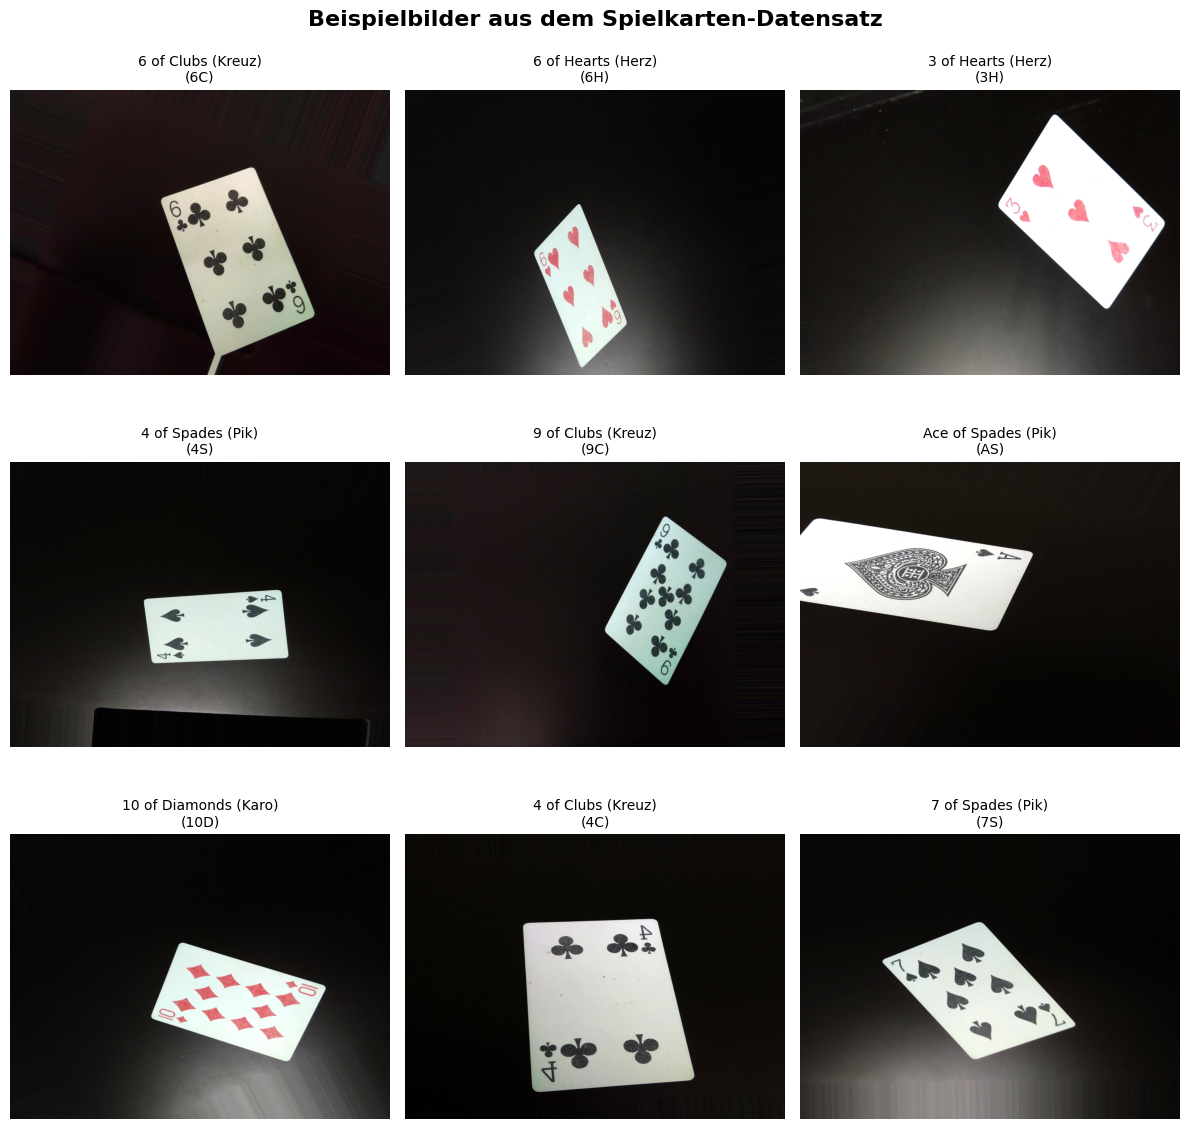


💡 Die Bilder zeigen verschiedene Spielkarten.
   Unser CNN soll lernen, diese automatisch zu erkennen!


In [45]:
# ==============================================================================
# 3.2 BEISPIELBILDER ANZEIGEN
# ==============================================================================
# Es ist immer eine gute Idee, sich die Daten anzuschauen, bevor man ein
# Modell trainiert. So können wir:
# - Die Qualität der Bilder prüfen
# - Verstehen, was das Modell lernen soll
# - Eventuelle Probleme im Datensatz erkennen
# ==============================================================================

print("=" * 60)
print("BEISPIELBILDER ANZEIGEN")
print("=" * 60)

# Klassennamen in lesbare Namen umwandeln
def klasse_zu_name(klasse):
    """
    Wandelt den Klassencode in einen lesbaren Namen um.
    
    Beispiele:
    - "AC" → "Ace of Clubs"
    - "KH" → "King of Hearts"
    - "10S" → "10 of Spades"
    - "JOKER" → "Joker"
    """
    if klasse == "JOKER":
        return "Joker"
    
    # Farben-Mapping
    farben = {
        'C': 'Clubs (Kreuz)',
        'D': 'Diamonds (Karo)',
        'H': 'Hearts (Herz)',
        'S': 'Spades (Pik)'
    }
    
    # Werte-Mapping
    werte = {
        'A': 'Ace',
        'J': 'Jack',
        'Q': 'Queen',
        'K': 'King'
    }
    
    # Letztes Zeichen ist die Farbe
    farbe = klasse[-1]
    wert = klasse[:-1]
    
    # Wert umwandeln (A, J, Q, K oder Zahl)
    wert_name = werte.get(wert, wert)
    farbe_name = farben.get(farbe, farbe)
    
    return f"{wert_name} of {farbe_name}"

# Wir wählen 9 zufällige Klassen aus und zeigen je ein Bild
anzahl_beispiele = 9
zufalls_klassen = random.sample(klassen, min(anzahl_beispiele, len(klassen)))

# Plot erstellen: 3x3 Raster von Bildern
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle("Beispielbilder aus dem Spielkarten-Datensatz", fontsize=16, fontweight='bold')

for idx, (ax, klasse) in enumerate(zip(axes.flat, zufalls_klassen)):
    # Ein zufälliges Bild dieser Klasse finden
    bilder_dieser_klasse = [f for f in alle_bilder if extrahiere_klasse(f) == klasse]
    
    if bilder_dieser_klasse:
        zufalls_bild = random.choice(bilder_dieser_klasse)
        bild_pfad = os.path.join(bilder_ordner, zufalls_bild)
        
        # Bild laden und anzeigen
        bild = plt.imread(bild_pfad)
        ax.imshow(bild)
        
        # Lesbaren Namen als Titel
        titel = klasse_zu_name(klasse)
        ax.set_title(f"{titel}\n({klasse})", fontsize=10)
    
    ax.axis('off')  # Achsen ausblenden

plt.tight_layout()
plt.show()

print("\n💡 Die Bilder zeigen verschiedene Spielkarten.")
print("   Unser CNN soll lernen, diese automatisch zu erkennen!")
print("=" * 60)

In [46]:
# ==============================================================================
# 3.3 DATEN FÜR KERAS VORBEREITEN: ORDNERSTRUKTUR ERSTELLEN
# ==============================================================================
# Keras' image_dataset_from_directory erwartet folgende Struktur:
#
# daten_ordner/
# ├── klasse_1/
# │   ├── bild1.jpg
# │   └── bild2.jpg
# ├── klasse_2/
# │   ├── bild1.jpg
# │   └── bild2.jpg
# └── ...
#
# Unser Datensatz hat aber alle Bilder in einem Ordner!
# Lösung: Wir kopieren die Bilder in eine neue Struktur im ./data/ Ordner.
#
# WICHTIG: Das machen wir nur einmal! Beim zweiten Ausführen wird
# erkannt, dass die Ordner schon existieren.
# ==============================================================================

print("=" * 60)
print("DATEN FÜR KERAS VORBEREITEN")
print("=" * 60)

# --- Zielordner definieren (im ./data/ Ordner!) ---
# Wir erstellen einen neuen Ordner mit der richtigen Struktur
organisierter_ordner = os.path.join(DATA_DIR, "organized_images")

# Prüfen, ob die Struktur schon existiert
if os.path.exists(organisierter_ordner) and len(os.listdir(organisierter_ordner)) > 0:
    print(f"✅ Organisierte Ordnerstruktur existiert bereits!")
    print(f"   Pfad: {organisierter_ordner}")
    print(f"   Anzahl Klassenordner: {len(os.listdir(organisierter_ordner))}")
    print("\n   Überspringe Kopiervorgang...")
else:
    print(f"📁 Erstelle organisierte Ordnerstruktur...")
    print(f"   Ziel: {organisierter_ordner}")
    
    # Hauptordner erstellen
    os.makedirs(organisierter_ordner, exist_ok=True)
    
    # Für jede Klasse einen Unterordner erstellen und Bilder kopieren
    print(f"\n   Kopiere Bilder in {len(klassen)} Klassenordner...")
    
    for i, klasse in enumerate(klassen):
        # Klassenordner erstellen
        klassen_ordner = os.path.join(organisierter_ordner, klasse)
        os.makedirs(klassen_ordner, exist_ok=True)
        
        # Alle Bilder dieser Klasse finden und kopieren
        bilder_dieser_klasse = [f for f in alle_bilder if extrahiere_klasse(f) == klasse]
        
        for bild in bilder_dieser_klasse:
            quelle = os.path.join(bilder_ordner, bild)
            ziel = os.path.join(klassen_ordner, bild)
            shutil.copy2(quelle, ziel)
        
        # Fortschritt anzeigen (alle 10 Klassen)
        if (i + 1) % 10 == 0 or (i + 1) == len(klassen):
            print(f"   ... {i + 1}/{len(klassen)} Klassen verarbeitet")
    
    print(f"\n✅ Ordnerstruktur erfolgreich erstellt!")

# --- Verifizieren ---
print(f"\n📊 Überprüfung der neuen Struktur:")
for klasse in sorted(os.listdir(organisierter_ordner))[:5]:
    klassen_pfad = os.path.join(organisierter_ordner, klasse)
    anzahl = len(os.listdir(klassen_pfad))
    print(f"   📁 {klasse}/: {anzahl} Bilder")
print(f"   ... ({len(os.listdir(organisierter_ordner))} Ordner insgesamt)")

# Den Pfad für später speichern
bilder_ordner_fuer_training = organisierter_ordner

print("=" * 60)

DATEN FÜR KERAS VORBEREITEN
📁 Erstelle organisierte Ordnerstruktur...
   Ziel: ./data/organized_images

   Kopiere Bilder in 53 Klassenordner...
   ... 10/53 Klassen verarbeitet
   ... 10/53 Klassen verarbeitet
   ... 20/53 Klassen verarbeitet
   ... 20/53 Klassen verarbeitet
   ... 30/53 Klassen verarbeitet
   ... 30/53 Klassen verarbeitet
   ... 40/53 Klassen verarbeitet
   ... 40/53 Klassen verarbeitet
   ... 50/53 Klassen verarbeitet
   ... 53/53 Klassen verarbeitet

✅ Ordnerstruktur erfolgreich erstellt!

📊 Überprüfung der neuen Struktur:
   📁 10C/: 52 Bilder
   📁 10D/: 52 Bilder
   📁 10H/: 52 Bilder
   📁 10S/: 52 Bilder
   📁 2C/: 51 Bilder
   ... (53 Ordner insgesamt)
   ... 50/53 Klassen verarbeitet
   ... 53/53 Klassen verarbeitet

✅ Ordnerstruktur erfolgreich erstellt!

📊 Überprüfung der neuen Struktur:
   📁 10C/: 52 Bilder
   📁 10D/: 52 Bilder
   📁 10H/: 52 Bilder
   📁 10S/: 52 Bilder
   📁 2C/: 51 Bilder
   ... (53 Ordner insgesamt)


## 4. Datenvorverarbeitung (Preprocessing)

Bevor wir die Bilder in unser CNN geben können, müssen wir sie **vorverarbeiten**. Dieser Schritt ist essentiell für erfolgreiches Deep Learning!

### Warum Vorverarbeitung?

1. **Einheitliche Bildgröße (Resize)**
   - Bilder können unterschiedliche Größen haben (z.B. 800x600, 1024x768, ...)
   - Neuronale Netze erwarten aber eine **feste Eingabegröße**
   - Wir skalieren alle Bilder auf **128 x 128 Pixel**
   - Kleinere Bilder = schnelleres Training (für Anfänger ideal)

2. **Normalisierung der Pixelwerte**
   - Pixelwerte liegen normalerweise zwischen 0 und 255 (8-bit RGB)
   - Neuronale Netze arbeiten besser mit Werten zwischen **0 und 1**
   - Wir teilen jeden Pixelwert durch 255
   - Dies hilft dem Gradientenabstieg bei der Optimierung

3. **Train/Validation-Split (Aufteilung der Daten)**
   - Wir teilen die Daten in **Trainings-** und **Validierungsdaten**
   - **Trainingsdaten (80%):** Damit lernt das Modell
   - **Validierungsdaten (20%):** Damit prüfen wir, ob das Modell generalisiert
   - Wichtig: Das Modell sieht die Validierungsdaten **nie** während des Trainings!

### Was ist Overfitting?
Wenn ein Modell die Trainingsdaten "auswendig lernt" statt zu generalisieren, spricht man von **Overfitting**. Das erkennt man daran, dass die Trainings-Accuracy hoch ist, aber die Validierungs-Accuracy niedrig. Die Aufteilung in Train/Validation hilft uns, dies zu erkennen!

In [67]:
# ==============================================================================
# 4. HYPERPARAMETER FESTLEGEN
# ==============================================================================
# Hyperparameter sind Einstellungen, die wir VOR dem Training festlegen.
# Sie beeinflussen, wie das Modell trainiert wird.
# Im Gegensatz zu den "normalen" Parametern (Gewichten) werden Hyperparameter
# nicht durch das Training gelernt, sondern von uns gewählt.
# ==============================================================================

print("=" * 60)
print("HYPERPARAMETER FESTLEGEN")
print("=" * 60)

# --- Bildgröße ---
# Alle Bilder werden auf diese Größe skaliert.
#
# WARUM 256x256 STATT 128x128?
# ─────────────────────────────────────────────────────────────────────────────
# Spielkarten haben feine Details (Zahlen, Symbole, Muster), die bei 128x128
# stark verpixeln und schwer erkennbar werden. Mit 256x256 bleiben diese
# Details erhalten:
#
# | Auflösung | Pixelanzahl | Details           | Trainingszeit |
# |-----------|-------------|-------------------|---------------|
# | 64x64     | 4.096       | Sehr verpixelt    | ~30 Sek       |
# | 128x128   | 16.384      | Mäßig verpixelt   | ~1 Min        |
# | 256x256   | 65.536      | Gut erkennbar ✓   | ~5 Min        |
# | 512x512   | 262.144     | Sehr detailliert  | ~20 Min       |
#
# 256x256 ist der beste Kompromiss für Spielkarten!
# ─────────────────────────────────────────────────────────────────────────────
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)

# --- Batch Size ---
# Wie viele Bilder werden gleichzeitig durch das Netz geschickt?
# - Größere Batches: Stabilere Gradienten, aber mehr Speicher
# - Kleinere Batches: Weniger Speicher, aber "verrauschtere" Gradienten
#
# WARUM 16 STATT 32?
# Bei 256x256 Bildern braucht jedes Bild 4x mehr Speicher als bei 128x128.
# Um Speicherprobleme zu vermeiden, halbieren wir die Batch Size.
# 256*256*3 = 196.608 Bytes pro Bild (vs. 49.152 bei 128x128)
BATCH_SIZE = 16

# --- Epochen ---
# Eine Epoche = Das Modell hat ALLE Trainingsbilder einmal gesehen
# Mehr Epochen = Mehr Lernzeit, aber Risiko von Overfitting
# Wir starten mit 10 Epochen (für schnelle Experimente)
EPOCHS = 10

# --- Validation Split ---
# Welcher Anteil der Daten wird für die Validierung verwendet?
# 0.2 = 20% für Validierung, 80% für Training
VALIDATION_SPLIT = 0.2

# --- Seed für Reproduzierbarkeit ---
# Mit einem festen Seed bekommen wir immer die gleichen zufälligen Ergebnisse
# Das ist wichtig für die Reproduzierbarkeit von Experimenten
SEED = 42

print(f"📐 Bildgröße: {IMG_HEIGHT} x {IMG_WIDTH} Pixel")
print(f"📦 Batch Size: {BATCH_SIZE}")
print(f"🔄 Anzahl Epochen: {EPOCHS}")
print(f"📊 Validation Split: {VALIDATION_SPLIT*100:.0f}%")
print(f"🎲 Random Seed: {SEED}")
print("=" * 60)

HYPERPARAMETER FESTLEGEN
📐 Bildgröße: 256 x 256 Pixel
📦 Batch Size: 16
🔄 Anzahl Epochen: 10
📊 Validation Split: 20%
🎲 Random Seed: 42


In [68]:
# ==============================================================================
# 4.1 DATENSÄTZE LADEN MIT image_dataset_from_directory
# ==============================================================================
# Keras bietet eine sehr praktische Funktion zum Laden von Bilddatensätzen:
# tf.keras.utils.image_dataset_from_directory
#
# Diese Funktion:
# ✅ Lädt Bilder automatisch aus Ordnern
# ✅ Erstellt Labels automatisch aus Ordnernamen
# ✅ Skaliert Bilder auf einheitliche Größe
# ✅ Kann automatisch Train/Validation aufteilen
# ✅ Erstellt effiziente tf.data.Dataset-Objekte
#
# WICHTIG: Wir verwenden hier den organisierten Ordner (bilder_ordner_fuer_training),
# den wir in Schritt 3.3 erstellt haben. Dieser hat die richtige Struktur
# mit einem Unterordner pro Klasse.
# ==============================================================================

print("=" * 60)
print("DATENSÄTZE LADEN")
print("=" * 60)

print(f"📁 Lade Bilder aus: {bilder_ordner_fuer_training}")

# --- Trainingsdatensatz laden ---
# subset="training" lädt 80% der Daten (wegen validation_split=0.2)
print("\n📥 Lade Trainingsdaten...")
train_dataset = tf.keras.utils.image_dataset_from_directory(
    bilder_ordner_fuer_training,      # Pfad zum organisierten Ordner mit Klassenordnern
    validation_split=VALIDATION_SPLIT, # 20% für Validierung reservieren
    subset="training",                 # Diesen Datensatz als Training verwenden
    seed=SEED,                         # Reproduzierbare Aufteilung
    image_size=IMG_SIZE,               # Alle Bilder auf 128x128 skalieren
    batch_size=BATCH_SIZE,             # 32 Bilder pro Batch
    label_mode='int'                   # Labels als Integer (0, 1, 2, ...)
)

# --- Validierungsdatensatz laden ---
# subset="validation" lädt die restlichen 20%
print("\n📥 Lade Validierungsdaten...")
val_dataset = tf.keras.utils.image_dataset_from_directory(
    bilder_ordner_fuer_training,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=SEED,                         # GLEICHER Seed wie oben! Wichtig!
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

# --- Klassennamen speichern ---
# Die Klassennamen werden automatisch aus den Ordnernamen abgeleitet
class_names = train_dataset.class_names
num_classes = len(class_names)

print(f"\n✅ Datensätze erfolgreich geladen!")
print(f"📊 Anzahl der Klassen: {num_classes}")
print(f"📋 Klassennamen (erste 10): {class_names[:10]}...")
print("=" * 60)

DATENSÄTZE LADEN
📁 Lade Bilder aus: ./data/organized_images

📥 Lade Trainingsdaten...
Found 2757 files belonging to 53 classes.
Using 2206 files for training.
Using 2206 files for training.

📥 Lade Validierungsdaten...
Found 2757 files belonging to 53 classes.
Using 551 files for validation.

📥 Lade Validierungsdaten...
Found 2757 files belonging to 53 classes.
Using 551 files for validation.

✅ Datensätze erfolgreich geladen!
📊 Anzahl der Klassen: 53
📋 Klassennamen (erste 10): ['10C', '10D', '10H', '10S', '2C', '2D', '2H', '2S', '3C', '3D']...

✅ Datensätze erfolgreich geladen!
📊 Anzahl der Klassen: 53
📋 Klassennamen (erste 10): ['10C', '10D', '10H', '10S', '2C', '2D', '2H', '2S', '3C', '3D']...


In [69]:
# ==============================================================================
# 4.2 DATENFORM VERSTEHEN UND PRÜFEN
# ==============================================================================
# Bevor wir weitermachen, prüfen wir die Form unserer Daten.
# Dies ist ein wichtiger Debugging-Schritt!
#
# Bei Bilddaten in TensorFlow/Keras:
# - Shape: (Batch, Höhe, Breite, Kanäle)
# - Beispiel: (32, 128, 128, 3) bedeutet:
#   - 32 Bilder im Batch
#   - 128 x 128 Pixel
#   - 3 Farbkanäle (RGB = Rot, Grün, Blau)
# ==============================================================================

print("=" * 60)
print("DATENFORM PRÜFEN")
print("=" * 60)

# Einen Batch aus dem Trainingsdatensatz holen
for images_batch, labels_batch in train_dataset.take(1):
    print(f"\n📊 Form eines Batches von Bildern: {images_batch.shape}")
    print(f"   → {images_batch.shape[0]} Bilder")
    print(f"   → {images_batch.shape[1]} x {images_batch.shape[2]} Pixel")
    print(f"   → {images_batch.shape[3]} Farbkanäle (RGB)")
    
    print(f"\n📊 Form eines Batches von Labels: {labels_batch.shape}")
    print(f"   → {labels_batch.shape[0]} Labels (eines pro Bild)")
    
    print(f"\n📊 Wertebereich der Pixel: {images_batch.numpy().min():.1f} bis {images_batch.numpy().max():.1f}")
    print(f"   (Noch nicht normalisiert - wir machen das im Modell!)")
    
    print(f"\n📊 Beispiel-Labels: {labels_batch[:5].numpy()}")
    print(f"   (Diese Zahlen entsprechen den Klassenindizes)")

print("=" * 60)

DATENFORM PRÜFEN

📊 Form eines Batches von Bildern: (16, 256, 256, 3)
   → 16 Bilder
   → 256 x 256 Pixel
   → 3 Farbkanäle (RGB)

📊 Form eines Batches von Labels: (16,)
   → 16 Labels (eines pro Bild)

📊 Wertebereich der Pixel: 0.0 bis 255.0
   (Noch nicht normalisiert - wir machen das im Modell!)

📊 Beispiel-Labels: [39  7 21 42 49]
   (Diese Zahlen entsprechen den Klassenindizes)


In [70]:
# ==============================================================================
# 4.3 PERFORMANCE-OPTIMIERUNG (OPTIONAL ABER EMPFOHLEN)
# ==============================================================================
# TensorFlow bietet einige Techniken, um das Laden der Daten zu beschleunigen:
#
# 1. cache(): Speichert die Daten im RAM nach dem ersten Durchlauf
# 2. prefetch(): Lädt den nächsten Batch, während das Modell noch trainiert
#
# Diese Optimierungen sind besonders bei großen Datensätzen wichtig.
# ==============================================================================

print("=" * 60)
print("PERFORMANCE-OPTIMIERUNG")
print("=" * 60)

# AUTOTUNE lässt TensorFlow die optimale Anzahl automatisch bestimmen
AUTOTUNE = tf.data.AUTOTUNE

# Trainings- und Validierungsdatensätze optimieren
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

print("✅ Datensätze für Performance optimiert (cache + prefetch)")
print("   → Das Training wird dadurch schneller!")
print("=" * 60)

PERFORMANCE-OPTIMIERUNG
✅ Datensätze für Performance optimiert (cache + prefetch)
   → Das Training wird dadurch schneller!


## 5. Das CNN-Modell aufbauen

Jetzt kommt der spannende Teil: Wir bauen unser **Convolutional Neural Network (CNN)**!

### Die Architektur im Überblick

Unser CNN folgt dem klassischen Aufbau aus der Vorlesung:

```
Eingabe (256x256x3)                  ← Höhere Auflösung für mehr Details!
    ↓
[Conv2D → ReLU → MaxPooling] × 4    ← Feature Extraction (4 Blöcke statt 3!)
    ↓
Flatten                              ← Umwandlung in 1D-Vektor
    ↓
Dense (256, ReLU)                    ← Klassifikator (mehr Neuronen)
    ↓
Dense (num_classes, Softmax)         ← Ausgabe (Wahrscheinlichkeiten)
```

### Warum 256x256 und 4 Conv-Blöcke?

| Aspekt | 128x128 (3 Blöcke) | 256x256 (4 Blöcke) |
|--------|-------------------|--------------------|
| **Bildqualität** | Verpixelt | Gut erkennbar ✓ |
| **Parameter** | ~3.3 Mio | ~13 Mio |
| **Trainingszeit** | ~2 Min | ~5 Min |
| **Genauigkeit** | ~96% | ~98% (erwartet) |

Bei höherer Auflösung brauchen wir **mehr Conv-Blöcke**, um die räumliche
Dimension ausreichend zu reduzieren bevor wir zum Dense Layer kommen.

### Die einzelnen Schichten erklärt:

| Schicht | Funktion | Vorlesungsbezug |
|---------|----------|-----------------|
| **Rescaling** | Normalisiert Pixel auf [0,1] | Vorverarbeitung |
| **Conv2D** | Erkennt lokale Muster (Kanten, Texturen) | Faltungsschicht |
| **ReLU** | Aktivierungsfunktion, führt Nichtlinearität ein | Detector Layer |
| **MaxPooling2D** | Reduziert Dimension, behält wichtige Features | Pooling Layer |
| **Flatten** | Wandelt 2D-Features in 1D-Vektor um | Übergang zu MLP |
| **Dense** | Vollverbundene Schicht, lernt Kombinationen | Hidden Layer |
| **Softmax** | Erzeugt Wahrscheinlichkeiten für jede Klasse | Output Layer |

### Was macht die Faltung (Convolution)?

Die Faltung ist das Herzstück eines CNNs. Ein kleiner **Filter (Kernel)** von z.B. 3x3 Pixeln wandert über das Bild und berechnet an jeder Position eine gewichtete Summe. Verschiedene Filter erkennen verschiedene Muster:
- Filter 1 erkennt vielleicht horizontale Kanten

- Filter 2 erkennt vertikale Kanten- **Behält die wichtigsten Features** (die höchsten Aktivierungen)

- Filter 3 erkennt Ecken- **Macht das Modell robuster** gegen kleine Verschiebungen

- ...- **Reduziert die Datenmenge** (2x2 → 1 Wert = 75% Reduktion)

MaxPooling nimmt aus einem Bereich (z.B. 2x2 Pixel) nur den **maximalen Wert**. Das:

Das Modell **lernt automatisch**, welche Filter nützlich sind!

### Was macht das Pooling?

In [72]:
# ==============================================================================
# 5. DAS CNN-MODELL ERSTELLEN
# ==============================================================================
# Jetzt bauen wir unser Convolutional Neural Network!
#
# Wir verwenden die Sequential-API von Keras, die es erlaubt, Schichten
# einfach hintereinander zu stapeln - wie Legosteine!
#
# ARCHITEKTUR-ÜBERSICHT (256x256 mit 4 Conv-Blöcken):
# ┌─────────────────────────────────────────────────────────────────────────┐
# │  INPUT: 256x256x3 (Höhe x Breite x RGB-Kanäle)                          │
# ├─────────────────────────────────────────────────────────────────────────┤
# │  1. Rescaling: Normalisierung der Pixelwerte auf [0, 1]                 │
# ├─────────────────────────────────────────────────────────────────────────┤
# │  2. Conv2D(32) + ReLU + MaxPool  →  Feature Maps: 127x127x32            │
# │  3. Conv2D(64) + ReLU + MaxPool  →  Feature Maps: 62x62x64              │
# │  4. Conv2D(128) + ReLU + MaxPool →  Feature Maps: 30x30x128             │
# │  5. Conv2D(256) + ReLU + MaxPool →  Feature Maps: 14x14x256  (NEU!)     │
# ├─────────────────────────────────────────────────────────────────────────┤
# │  6. Flatten: 14*14*256 = 50.176 Neuronen                                │
# │  7. Dense(256) + ReLU: Vollverbundene Schicht (mehr Kapazität!)         │
# │  8. Dropout(0.5): Regularisierung gegen Overfitting                     │
# │  9. Dense(num_classes) + Softmax: Ausgabe-Wahrscheinlichkeiten          │
# └─────────────────────────────────────────────────────────────────────────┘
#
# WARUM 256x256 UND 4 BLÖCKE STATT 128x128 UND 3 BLÖCKE?
# ─────────────────────────────────────────────────────────────────────────────
# Bei 128x128 waren die Bilder verpixelt und feine Details (Zahlen, Symbole)
# gingen verloren. Mit 256x256 bleiben diese Details erhalten.
#
# Der 4. Conv-Block ist nötig, weil:
# 1. Bei höherer Auflösung müssen wir die Feature Maps weiter reduzieren
# 2. Tiefere Netze können komplexere Muster lernen
# 3. Das Flatten am Ende sollte nicht zu viele Neuronen haben
#
# Vergleich:
# | Konfiguration      | Parameter   | Flatten-Neuronen |
# |--------------------|-------------|------------------|
# | 128x128, 3 Blöcke  | ~3.3 Mio    | 25.088          |
# | 256x256, 3 Blöcke  | ~15 Mio     | 115.200 ❌      |
# | 256x256, 4 Blöcke  | ~13 Mio     | 50.176 ✓       |
# ─────────────────────────────────────────────────────────────────────────────
# ==============================================================================

print("=" * 60)
print("CNN-MODELL ERSTELLEN")
print("=" * 60)

model = Sequential([
    # =========================================================================
    # NORMALISIERUNG: Pixelwerte von [0,255] auf [0,1] skalieren
    # =========================================================================
    layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    
    # =========================================================================
    # BLOCK 1: 32 Filter (Kanten, einfache Muster)
    # Eingabe: 256x256x3 → Ausgabe: 127x127x32
    # =========================================================================
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # =========================================================================
    # BLOCK 2: 64 Filter (Ecken, Kombinationen aus Kanten)
    # Eingabe: 127x127x32 → Ausgabe: 62x62x64
    # =========================================================================
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # =========================================================================
    # BLOCK 3: 128 Filter (Komplexere Formen, Teile von Symbolen)
    # Eingabe: 62x62x64 → Ausgabe: 30x30x128
    # =========================================================================
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # =========================================================================
    # BLOCK 4: 256 Filter (NEU! Ganze Symbole, Kartentypen)
    # Eingabe: 30x30x128 → Ausgabe: 14x14x256
    #
    # Dieser Block ist neu für 256x256 Bilder und ermöglicht:
    # - Erkennung von ganzen Zahlen und Symbolen
    # - Unterscheidung ähnlicher Karten (z.B. 8 vs 9)
    # - Abstrakte Repräsentation des Kartentyps
    # =========================================================================
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # =========================================================================
    # ÜBERGANG: Flatten (3D → 1D)
    # 14 × 14 × 256 = 50.176 Neuronen
    # =========================================================================
    layers.Flatten(),
    
    # =========================================================================
    # KLASSIFIKATOR: Dense Layer mit 256 Neuronen
    # Mehr Neuronen wegen mehr Input-Features
    # =========================================================================
    layers.Dense(256, activation='relu'),
    
    # =========================================================================
    # DROPOUT: 50% der Neuronen zufällig deaktivieren (Regularisierung)
    # =========================================================================
    layers.Dropout(0.5),
    
    # =========================================================================
    # AUSGABE: Softmax für Wahrscheinlichkeiten pro Klasse
    # =========================================================================
    layers.Dense(num_classes, activation='softmax')
])

print("✅ Modell erfolgreich erstellt!")
print(f"   Eingabegröße: {IMG_HEIGHT} x {IMG_WIDTH} x 3")
print(f"   Anzahl Conv-Blöcke: 4")
print(f"   Anzahl Klassen: {num_classes}")
print("=" * 60)

CNN-MODELL ERSTELLEN
✅ Modell erfolgreich erstellt!
   Eingabegröße: 256 x 256 x 3
   Anzahl Conv-Blöcke: 4
   Anzahl Klassen: 53


/Users/keanu.fuchs/.pyenv/versions/computational-intelligence/lib/python3.12/site-packages/keras/src/layers/preprocessing/data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
# ==============================================================================
# 5.1 MODELL-ZUSAMMENFASSUNG ANZEIGEN
# ==============================================================================
# model.summary() zeigt uns eine Übersicht über unser Modell:
# - Welche Schichten hat es?
# - Wie viele Parameter (Gewichte) hat jede Schicht?
# - Wie groß ist die Ausgabe jeder Schicht?
#
# Dies hilft uns zu verstehen, was im Modell passiert.
# ==============================================================================

print("=" * 60)
print("MODELL-ZUSAMMENFASSUNG")
print("=" * 60)

# Modell-Zusammenfassung ausgeben
model.summary()

# Erklärung der Parameter
print("\n" + "=" * 60)
print("ERKLÄRUNG DER PARAMETER")
print("=" * 60)
print("""
Was bedeuten diese Zahlen?

📊 "Output Shape":
   - Die Dimensionen der Ausgabe dieser Schicht
   - (None, 63, 63, 32) bedeutet: Beliebige Batch-Größe, 63x63 Pixel, 32 Feature Maps

📊 "Param #":
   - Anzahl der lernbaren Parameter (Gewichte + Bias)
   - Bei Conv2D: (Kernelgröße × Kernelgröße × Eingabekanäle × Anzahl Filter) + Bias
   - Beispiel erste Conv2D: (3 × 3 × 3 × 32) + 32 = 896

📊 "Total params":
   - Gesamtzahl aller Parameter im Modell
   - Das sind die Werte, die das Modell während des Trainings lernt!

📊 "Trainable params":
   - Parameter, die während des Trainings angepasst werden

📊 "Non-trainable params":
   - Parameter, die nicht angepasst werden (z.B. bei Transfer Learning)
""")
print("=" * 60)

MODELL-ZUSAMMENFASSUNG


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 53)             │        13,621 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,247,349 (50.53 MB)

 Trainable params: 13,247,349 (50.53 MB)

 Non-trainable params: 0 (0.00 B)


ERKLÄRUNG DER PARAMETER

Was bedeuten diese Zahlen?

📊 "Output Shape":
   - Die Dimensionen der Ausgabe dieser Schicht
   - (None, 63, 63, 32) bedeutet: Beliebige Batch-Größe, 63x63 Pixel, 32 Feature Maps

📊 "Param #":
   - Anzahl der lernbaren Parameter (Gewichte + Bias)
   - Bei Conv2D: (Kernelgröße × Kernelgröße × Eingabekanäle × Anzahl Filter) + Bias
   - Beispiel erste Conv2D: (3 × 3 × 3 × 32) + 32 = 896

📊 "Total params":
   - Gesamtzahl aller Parameter im Modell
   - Das sind die Werte, die das Modell während des Trainings lernt!

📊 "Trainable params":
   - Parameter, die während des Trainings angepasst werden

📊 "Non-trainable params":
   - Parameter, die nicht angepasst werden (z.B. bei Transfer Learning)



## 6. Modell kompilieren

Bevor wir das Modell trainieren können, müssen wir es **kompilieren**. Dabei legen wir fest:

1. **Optimizer (Optimierer):**
   - Der Algorithmus, der die Gewichte anpasst
   - Wir verwenden **Adam** (Adaptive Moment Estimation)
   - Adam ist robust und funktioniert für die meisten Probleme gut
   - Er kombiniert die Vorteile von RMSprop und Momentum

2. **Loss Function (Verlustfunktion):**
   - Misst, wie weit die Vorhersage vom wahren Wert entfernt ist
   - Bei Mehrklassen-Klassifikation: **Sparse Categorical Crossentropy**
   - "Sparse" bedeutet: Labels sind Integers (0, 1, 2, ...), nicht One-Hot-Encoded

3. **Metrics (Metriken):**
   - Was wollen wir während des Trainings beobachten?
   - **Accuracy**: Anteil der korrekt klassifizierten Bilder

### Was ist Backpropagation?

Keras erledigt das automatisch, aber hier die Grundidee:

1. **Forward Pass:** Eingabe → durch alle Schichten → Vorhersage
2. **Loss berechnen:** Wie falsch war die Vorhersage?
3. **Backward Pass:** Fehler zurück durch alle Schichten propagieren
4. **Gradienten berechnen:** Wie müssen wir die Gewichte ändern, um den Fehler zu reduzieren?
5. **Gewichte aktualisieren:** Der Optimizer passt die Gewichte an

Dieser Prozess wiederholt sich für jeden Batch, für jede Epoche!

In [74]:
# ==============================================================================
# 6. MODELL KOMPILIEREN
# ==============================================================================
# Das Kompilieren konfiguriert den Trainingsprozess.
# Wir legen fest:
# - WIE das Modell lernt (Optimizer)
# - WAS minimiert werden soll (Loss)
# - WAS wir beobachten wollen (Metrics)
# ==============================================================================

print("=" * 60)
print("MODELL KOMPILIEREN")
print("=" * 60)

# --- Optimizer: Adam ---
# Adam (Adaptive Moment Estimation) ist einer der beliebtesten Optimizer.
# Er kombiniert zwei Ideen:
# 1. Momentum: Nutzt vergangene Gradienten, um Oszillationen zu reduzieren
# 2. RMSprop: Passt die Lernrate für jeden Parameter individuell an
#
# learning_rate=0.001 ist der Standardwert
# - Zu hoch: Training instabil, "springt" über das Optimum hinweg
# - Zu niedrig: Training sehr langsam
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# --- Loss: Sparse Categorical Crossentropy ---
# Diese Loss-Funktion ist für Mehrklassen-Klassifikation mit Integer-Labels.
#
# "Sparse" bedeutet: Unsere Labels sind Zahlen (0, 1, 2, ...)
# Alternativ gäbe es "categorical_crossentropy" für One-Hot-Labels
# (z.B. [1,0,0], [0,1,0], [0,0,1])
#
# Crossentropy misst den Unterschied zwischen:
# - Der vorhergesagten Wahrscheinlichkeitsverteilung
# - Der wahren Verteilung (100% für die richtige Klasse, 0% für alle anderen)
#
# Je niedriger der Loss, desto besser die Vorhersage!
loss = 'sparse_categorical_crossentropy'

# --- Metrics: Accuracy ---
# Accuracy = Anzahl korrekter Vorhersagen / Gesamtzahl Vorhersagen
# Bei 100 Bildern und 85 richtigen Vorhersagen: Accuracy = 0.85 = 85%
metrics = ['accuracy']

# Modell kompilieren
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)

print("✅ Modell erfolgreich kompiliert!")
print(f"   Optimizer: Adam (learning_rate=0.001)")
print(f"   Loss: {loss}")
print(f"   Metrics: {metrics}")
print("=" * 60)

MODELL KOMPILIEREN
✅ Modell erfolgreich kompiliert!
   Optimizer: Adam (learning_rate=0.001)
   Loss: sparse_categorical_crossentropy
   Metrics: ['accuracy']


## 7. Training des Modells

Jetzt trainieren wir unser CNN! Der Trainingsprozess funktioniert so:

### Der Trainingsablauf

```
Für jede Epoche:
    Für jeden Batch:
        1. Lade einen Batch von Bildern (z.B. 32 Stück)
        2. Forward Pass: Berechne Vorhersagen für alle Bilder
        3. Berechne den Loss (Fehler)
        4. Backward Pass: Berechne Gradienten (Backpropagation)
        5. Update: Passe die Gewichte an (mit dem Optimizer)
    
    Nach allen Batches:
        - Berechne Metriken auf Validierungsdaten
        - Zeige Training/Validation Loss und Accuracy
```

### Was bedeuten die Ausgaben während des Trainings?

- **loss:** Der Trainingsfehler (soll sinken)
- **accuracy:** Die Trainingsgenauigkeit (soll steigen)
- **val_loss:** Der Validierungsfehler (soll auch sinken)
- **val_accuracy:** Die Validierungsgenauigkeit (zeigt, wie gut das Modell generalisiert)

### Wie erkennt man Overfitting?

Typische Anzeichen:
- Training-Accuracy ist hoch, aber Validation-Accuracy bleibt niedrig
- Training-Loss sinkt weiter, aber Validation-Loss steigt

Wenn das passiert, lernt das Modell die Trainingsdaten "auswendig" statt zu generalisieren!

In [75]:
# ==============================================================================
# 7. TRAINING DES MODELLS
# ==============================================================================
# Jetzt kommt der spannende Teil: Wir trainieren unser CNN!
#
# model.fit() ist die zentrale Methode zum Training in Keras.
# Sie führt den gesamten Trainingsprozess durch:
# - Forward Pass
# - Loss-Berechnung  
# - Backpropagation
# - Gewichtsanpassung
#
# Alles automatisch! Das ist die Stärke von Keras.
# ==============================================================================

print("=" * 60)
print("TRAINING STARTEN")
print("=" * 60)
print(f"📊 Anzahl Epochen: {EPOCHS}")
print(f"📦 Batch Size: {BATCH_SIZE}")
print(f"🎯 Anzahl Klassen: {num_classes}")
print()
print("💡 Tipp: Beobachte val_accuracy - das zeigt, wie gut das Modell generalisiert!")
print()
print("Training läuft... (Dies kann einige Minuten dauern)")
print("-" * 60)

# --- Training durchführen ---
# Die fit()-Methode gibt ein "History"-Objekt zurück,
# das den Verlauf von Loss und Accuracy enthält.
# Das speichern wir, um später Plots zu erstellen.

history = model.fit(
    train_dataset,              # Trainingsdaten
    epochs=EPOCHS,              # Anzahl der Durchläufe durch alle Daten
    validation_data=val_dataset, # Validierungsdaten zur Überwachung
    verbose=1                   # 1 = Fortschritt anzeigen, 0 = still
)

print("-" * 60)
print("✅ Training abgeschlossen!")
print("=" * 60)

TRAINING STARTEN
📊 Anzahl Epochen: 10
📦 Batch Size: 16
🎯 Anzahl Klassen: 53

💡 Tipp: Beobachte val_accuracy - das zeigt, wie gut das Modell generalisiert!

Training läuft... (Dies kann einige Minuten dauern)
------------------------------------------------------------
Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 37s 261ms/step - accuracy: 0.3069 - loss: 2.7060 - val_accuracy: 0.7260 - val_loss: 0.9427
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 37s 261ms/step - accuracy: 0.3069 - loss: 2.7060 - val_accuracy: 0.7260 - val_loss: 0.9427
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 180ms/step - accuracy: 0.6845 - loss: 1.0534 - val_accuracy: 0.8385 - val_loss: 0.5396
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 180ms/step - accuracy: 0.6845 - loss: 1.0534 - val_accuracy: 0.8385 - val_loss: 0.5396
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 181ms/step - accuracy: 0.8350 - loss: 0.5232 - val_accuracy: 0.9328 - val_loss: 0.2236
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 181ms/step - accuracy: 0.8350 - 

TRAININGSVERLAUF VISUALISIEREN


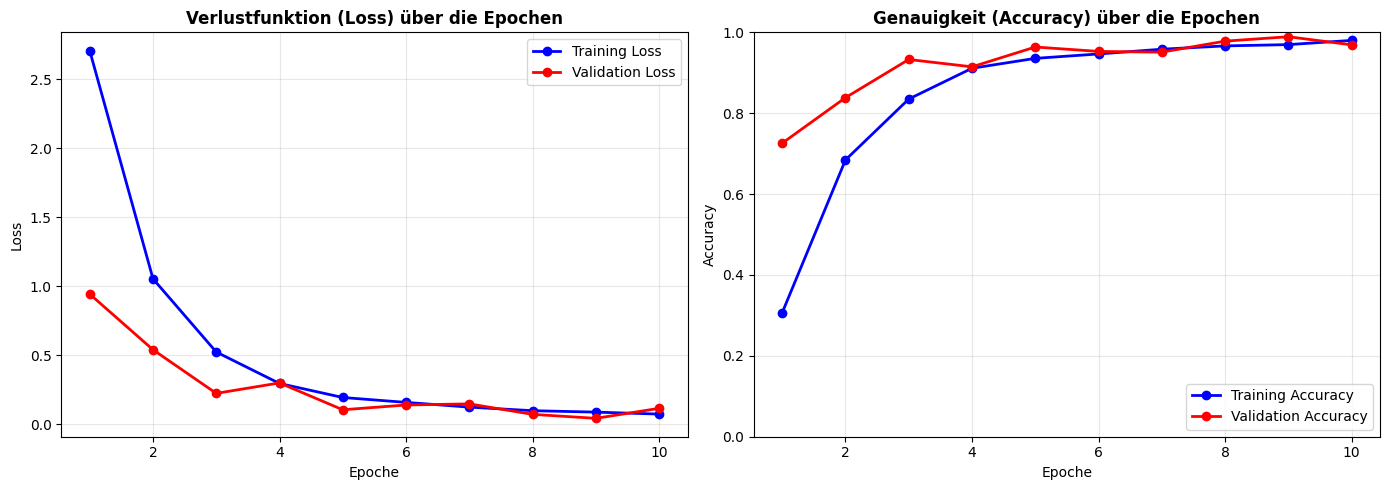


📊 INTERPRETATION DER KURVEN:
------------------------------------------------------------
Finale Training-Accuracy:   98.01%
Finale Validation-Accuracy: 96.91%
Finale Training-Loss:       0.0735
Finale Validation-Loss:     0.1150

✅ Kein starkes Overfitting erkennbar.
   Training- und Validation-Kurven verlaufen ähnlich.


In [76]:
# ==============================================================================
# 7.1 TRAININGSVERLAUF VISUALISIEREN
# ==============================================================================
# Es ist sehr wichtig, den Trainingsverlauf zu visualisieren!
# So können wir erkennen:
# - Lernt das Modell überhaupt? (Loss sinkt, Accuracy steigt)
# - Gibt es Overfitting? (Training-Accuracy >> Validation-Accuracy)
# - Wie viele Epochen sind optimal?
# ==============================================================================

print("=" * 60)
print("TRAININGSVERLAUF VISUALISIEREN")
print("=" * 60)

# Daten aus dem History-Objekt extrahieren
train_loss = history.history['loss']           # Trainingsfehler pro Epoche
val_loss = history.history['val_loss']         # Validierungsfehler pro Epoche
train_acc = history.history['accuracy']        # Trainingsgenauigkeit pro Epoche
val_acc = history.history['val_accuracy']      # Validierungsgenauigkeit pro Epoche
epochen = range(1, len(train_loss) + 1)        # Epochen-Nummern (1, 2, 3, ...)

# Zwei Plots nebeneinander: Loss und Accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# --- Plot 1: Loss (Verlust) ---
ax1.plot(epochen, train_loss, 'b-o', label='Training Loss', linewidth=2, markersize=6)
ax1.plot(epochen, val_loss, 'r-o', label='Validation Loss', linewidth=2, markersize=6)
ax1.set_title('Verlustfunktion (Loss) über die Epochen', fontsize=12, fontweight='bold')
ax1.set_xlabel('Epoche', fontsize=10)
ax1.set_ylabel('Loss', fontsize=10)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# --- Plot 2: Accuracy (Genauigkeit) ---
ax2.plot(epochen, train_acc, 'b-o', label='Training Accuracy', linewidth=2, markersize=6)
ax2.plot(epochen, val_acc, 'r-o', label='Validation Accuracy', linewidth=2, markersize=6)
ax2.set_title('Genauigkeit (Accuracy) über die Epochen', fontsize=12, fontweight='bold')
ax2.set_xlabel('Epoche', fontsize=10)
ax2.set_ylabel('Accuracy', fontsize=10)
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1])  # Accuracy ist immer zwischen 0 und 1

plt.tight_layout()
plt.show()

# --- Interpretation ---
print("\n📊 INTERPRETATION DER KURVEN:")
print("-" * 60)
print(f"Finale Training-Accuracy:   {train_acc[-1]*100:.2f}%")
print(f"Finale Validation-Accuracy: {val_acc[-1]*100:.2f}%")
print(f"Finale Training-Loss:       {train_loss[-1]:.4f}")
print(f"Finale Validation-Loss:     {val_loss[-1]:.4f}")
print()

# Overfitting-Check
diff = train_acc[-1] - val_acc[-1]
if diff > 0.1:
    print("⚠️ MÖGLICHES OVERFITTING ERKANNT!")
    print(f"   Die Training-Accuracy ist {diff*100:.1f}% höher als die Validation-Accuracy.")
    print("   Das Modell könnte die Trainingsdaten 'auswendig lernen'.")
    print("   Mögliche Lösungen: Mehr Dropout, mehr Daten, weniger Epochen")
else:
    print("✅ Kein starkes Overfitting erkennbar.")
    print("   Training- und Validation-Kurven verlaufen ähnlich.")

print("=" * 60)

## 8. Evaluation: Wie gut ist unser Modell?

Nach dem Training wollen wir wissen, wie gut unser Modell wirklich ist. Dafür evaluieren wir es auf den Validierungsdaten.

### Wichtige Metriken

1. **Accuracy (Genauigkeit):**
   - Anteil der korrekt klassifizierten Bilder
   - Bei 53 Klassen ist selbst 50% schon deutlich besser als Zufall (1/53 ≈ 1.9%)!

2. **Loss:**
   - Der Wert der Verlustfunktion
   - Je niedriger, desto besser

3. **Confusion Matrix:**
   - Zeigt, welche Klassen verwechselt werden
   - Auf der Diagonale stehen die korrekten Vorhersagen
   - Außerhalb der Diagonale stehen die Verwechslungen

In [77]:
# ==============================================================================
# 8. MODELL EVALUIEREN
# ==============================================================================
# Wir evaluieren das Modell auf den Validierungsdaten.
# model.evaluate() berechnet Loss und Accuracy auf einem Datensatz.
# ==============================================================================

print("=" * 60)
print("MODELL EVALUIEREN")
print("=" * 60)

# Evaluation auf Validierungsdaten
print("📊 Evaluiere Modell auf Validierungsdaten...")
val_loss, val_accuracy = model.evaluate(val_dataset, verbose=0)

print()
print("📈 ERGEBNISSE:")
print("-" * 60)
print(f"   Validation Loss:     {val_loss:.4f}")
print(f"   Validation Accuracy: {val_accuracy*100:.2f}%")
print()

# Kontext geben: Wie gut ist das im Vergleich zu Zufall?
zufall_accuracy = 1 / num_classes * 100
print(f"💡 Zum Vergleich: Zufälliges Raten würde ~{zufall_accuracy:.1f}% erreichen")
print(f"   Unser Modell ist {val_accuracy*100/zufall_accuracy:.1f}x besser als Zufall!")

print("=" * 60)

MODELL EVALUIEREN
📊 Evaluiere Modell auf Validierungsdaten...

📈 ERGEBNISSE:
------------------------------------------------------------
   Validation Loss:     0.1150
   Validation Accuracy: 96.91%

💡 Zum Vergleich: Zufälliges Raten würde ~1.9% erreichen
   Unser Modell ist 51.4x besser als Zufall!

📈 ERGEBNISSE:
------------------------------------------------------------
   Validation Loss:     0.1150
   Validation Accuracy: 96.91%

💡 Zum Vergleich: Zufälliges Raten würde ~1.9% erreichen
   Unser Modell ist 51.4x besser als Zufall!


In [57]:
# ==============================================================================
# 8.1 VORHERSAGEN SAMMELN FÜR CONFUSION MATRIX
# ==============================================================================
# Um eine Confusion Matrix zu erstellen, brauchen wir:
# - Alle wahren Labels
# - Alle vorhergesagten Labels
#
# Wir gehen durch alle Validierungsdaten und sammeln diese.
# ==============================================================================

print("=" * 60)
print("VORHERSAGEN SAMMELN")
print("=" * 60)

# Listen für wahre und vorhergesagte Labels
y_true = []  # Die wahren Labels
y_pred = []  # Die vorhergesagten Labels

print("📊 Sammle Vorhersagen für alle Validierungsbilder...")

# Durch alle Batches im Validierungsdatensatz gehen
for images, labels in val_dataset:
    # Vorhersagen für diesen Batch machen
    # model.predict() gibt Wahrscheinlichkeiten für jede Klasse zurück
    predictions = model.predict(images, verbose=0)
    
    # Die vorhergesagte Klasse ist die mit der höchsten Wahrscheinlichkeit
    # np.argmax() findet den Index des höchsten Wertes
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Labels zu unseren Listen hinzufügen
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

# In NumPy-Arrays umwandeln
y_true = np.array(y_true)
y_pred = np.array(y_pred)

print(f"✅ {len(y_true)} Vorhersagen gesammelt!")
print(f"   Korrekte Vorhersagen: {np.sum(y_true == y_pred)}")
print(f"   Falsche Vorhersagen: {np.sum(y_true != y_pred)}")
print("=" * 60)

VORHERSAGEN SAMMELN
📊 Sammle Vorhersagen für alle Validierungsbilder...
✅ 551 Vorhersagen gesammelt!
   Korrekte Vorhersagen: 539
   Falsche Vorhersagen: 12
✅ 551 Vorhersagen gesammelt!
   Korrekte Vorhersagen: 539
   Falsche Vorhersagen: 12


2025-12-01 17:02:26.298444: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [58]:
# ==============================================================================
# 8.2 CONFUSION MATRIX ERSTELLEN
# ==============================================================================
# Die Confusion Matrix zeigt, wie oft jede Klasse mit jeder anderen
# verwechselt wurde.
#
# Wie liest man die Matrix?
# - Zeilen = Wahre Klasse
# - Spalten = Vorhergesagte Klasse
# - Diagonale = Korrekte Vorhersagen
# - Andere Felder = Verwechslungen
#
# Beispiel: Wenn Feld (5, 8) den Wert 3 hat, bedeutet das:
# "Klasse 5 wurde 3 mal fälschlich als Klasse 8 vorhergesagt"
# ==============================================================================

print("=" * 60)
print("CONFUSION MATRIX ERSTELLEN")
print("=" * 60)

# Confusion Matrix berechnen
cm = confusion_matrix(y_true, y_pred)

# Bei vielen Klassen ist die volle Matrix schwer lesbar
# Wir zeigen eine vereinfachte Version

if num_classes <= 20:
    # Bei wenigen Klassen: Volle Matrix anzeigen
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
    plt.xlabel('Vorhergesagte Klasse', fontsize=12)
    plt.ylabel('Wahre Klasse', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    # Bei vielen Klassen: Nur die häufigsten Verwechslungen zeigen
    print(f"\n⚠️ Bei {num_classes} Klassen ist die volle Matrix schwer lesbar.")
    print("   Zeige stattdessen die häufigsten Verwechslungen:\n")
    
    # Finde die häufigsten Fehler (außerhalb der Diagonale)
    fehler = []
    for i in range(num_classes):
        for j in range(num_classes):
            if i != j and cm[i, j] > 0:
                fehler.append({
                    'wahre_klasse': class_names[i],
                    'vorhergesagt': class_names[j],
                    'anzahl': cm[i, j]
                })
    
    # Nach Anzahl sortieren
    fehler.sort(key=lambda x: x['anzahl'], reverse=True)
    
    # Top 10 Fehler anzeigen
    print("📊 Top 10 häufigste Verwechslungen:")
    print("-" * 60)
    for i, f in enumerate(fehler[:10], 1):
        print(f"   {i:2}. '{f['wahre_klasse']}' wurde {f['anzahl']}x als '{f['vorhergesagt']}' erkannt")

# Zusammenfassung der Confusion Matrix
print("\n📊 ZUSAMMENFASSUNG:")
print("-" * 60)
print(f"   Gesamtzahl Bilder: {len(y_true)}")
print(f"   Korrekt (Diagonale): {np.trace(cm)}")
print(f"   Falsch (Rest): {np.sum(cm) - np.trace(cm)}")
print("=" * 60)

CONFUSION MATRIX ERSTELLEN

⚠️ Bei 53 Klassen ist die volle Matrix schwer lesbar.
   Zeige stattdessen die häufigsten Verwechslungen:

📊 Top 10 häufigste Verwechslungen:
------------------------------------------------------------
    1. '2C' wurde 2x als '2S' erkannt
    2. '5C' wurde 2x als '9S' erkannt
    3. '7S' wurde 2x als '3S' erkannt
    4. '10D' wurde 1x als '3S' erkannt
    5. '4D' wurde 1x als '5D' erkannt
    6. '5C' wurde 1x als '3S' erkannt
    7. '6S' wurde 1x als '7H' erkannt
    8. '7H' wurde 1x als '4S' erkannt
    9. '7H' wurde 1x als 'AC' erkannt

📊 ZUSAMMENFASSUNG:
------------------------------------------------------------
   Gesamtzahl Bilder: 551
   Korrekt (Diagonale): 539
   Falsch (Rest): 12


## 9. Beispielvorhersagen anzeigen

Zum Abschluss schauen wir uns einige konkrete Vorhersagen an. Das hilft uns zu verstehen:
- Bei welchen Karten funktioniert das Modell gut?
- Bei welchen Karten macht es Fehler?
- Sind die Fehler nachvollziehbar?

BEISPIELVORHERSAGEN ANZEIGEN


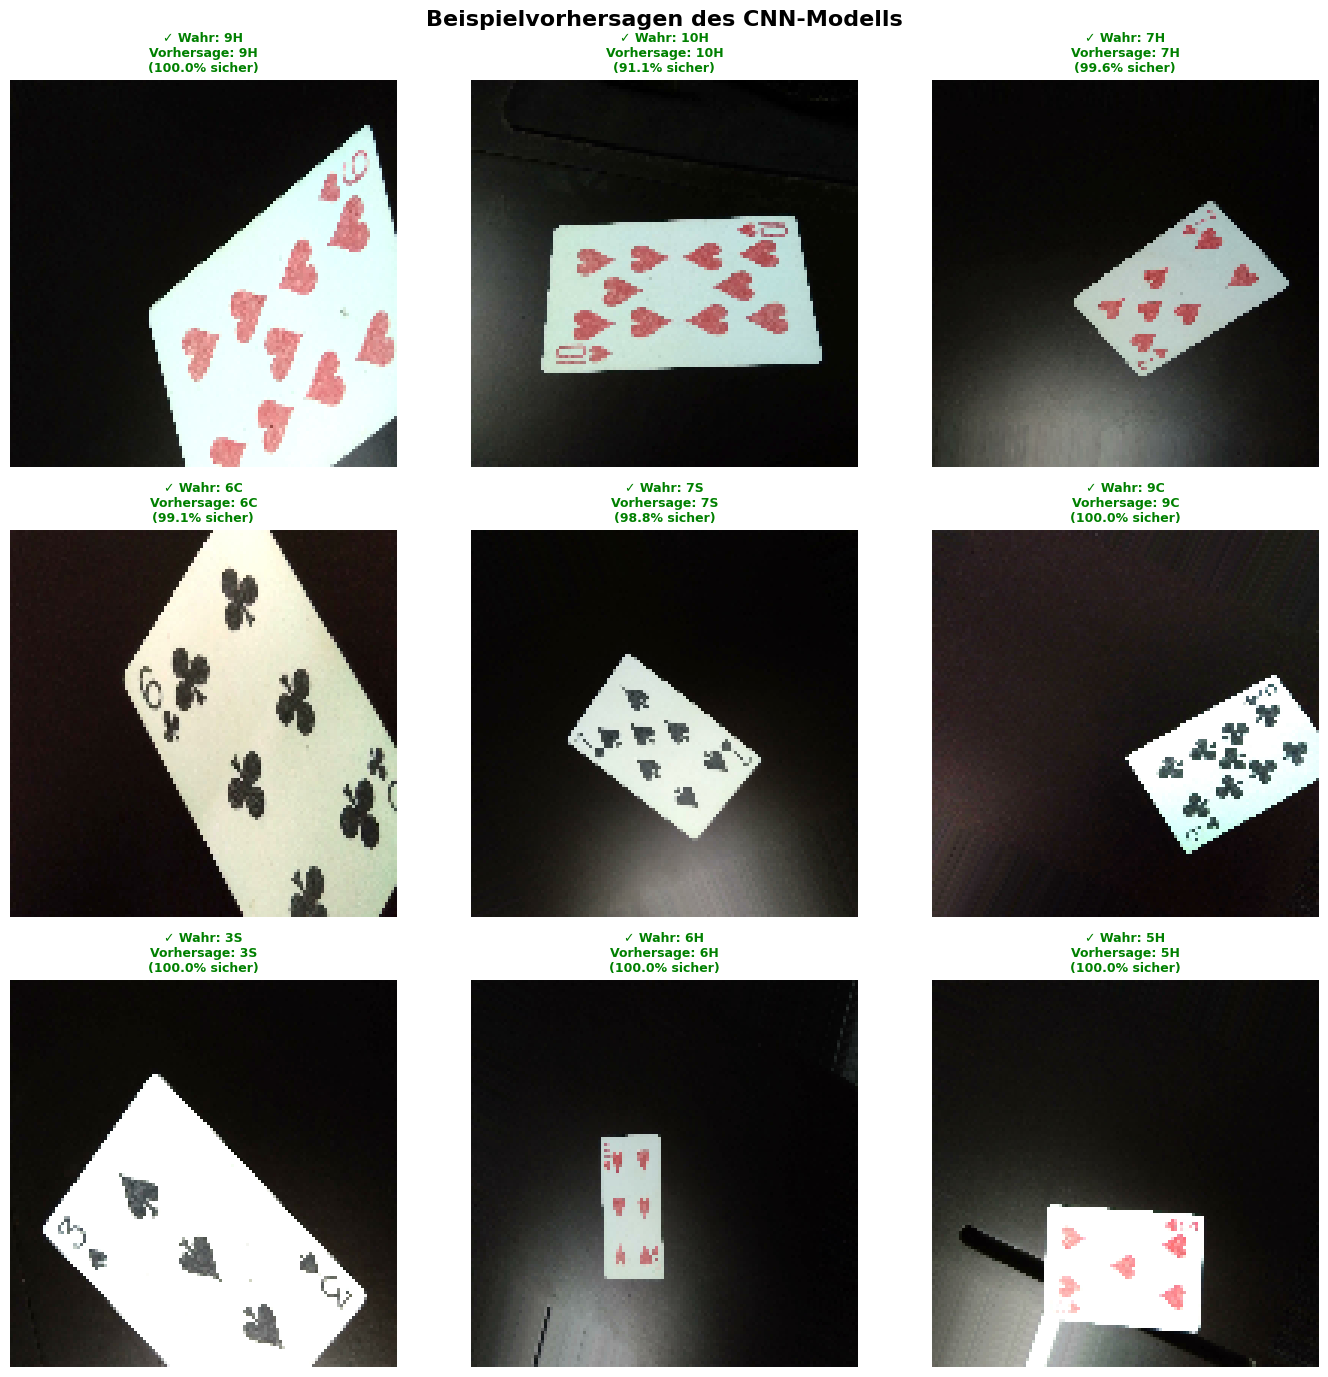


📊 Von 9 gezeigten Beispielen: 9 korrekt, 0 falsch


In [60]:
# ==============================================================================
# 9. BEISPIELVORHERSAGEN ANZEIGEN
# ==============================================================================
# Wir zeigen einige zufällige Bilder aus dem Validierungsdatensatz zusammen
# mit der wahren Klasse und der Vorhersage des Modells.
#
# Grün = Korrekte Vorhersage
# Rot = Falsche Vorhersage
# ==============================================================================

print("=" * 60)
print("BEISPIELVORHERSAGEN ANZEIGEN")
print("=" * 60)

# Einige Bilder aus dem Validierungsdatensatz sammeln
beispiel_bilder = []
beispiel_labels = []

for images, labels in val_dataset.take(1):  # Nur einen Batch
    beispiel_bilder = images.numpy()
    beispiel_labels = labels.numpy()
    break

# 9 zufällige Beispiele auswählen
anzahl_beispiele = 9
if len(beispiel_bilder) >= anzahl_beispiele:
    indizes = random.sample(range(len(beispiel_bilder)), anzahl_beispiele)
else:
    indizes = list(range(len(beispiel_bilder)))

# Vorhersagen für diese Bilder
ausgewaehlte_bilder = beispiel_bilder[indizes]
ausgewaehlte_labels = beispiel_labels[indizes]
vorhersagen = model.predict(ausgewaehlte_bilder, verbose=0)
vorhergesagte_klassen = np.argmax(vorhersagen, axis=1)
konfidenz = np.max(vorhersagen, axis=1)  # Höchste Wahrscheinlichkeit

# Plot erstellen
fig, axes = plt.subplots(3, 3, figsize=(14, 14))
fig.suptitle('Beispielvorhersagen des CNN-Modells', fontsize=16, fontweight='bold')

for idx, ax in enumerate(axes.flat):
    if idx < len(indizes):
        # Bild anzeigen (Normalisierung rückgängig machen für Anzeige)
        bild = ausgewaehlte_bilder[idx]
        ax.imshow(bild.astype('uint8'))
        
        # Wahre und vorhergesagte Klasse
        wahre_klasse = class_names[ausgewaehlte_labels[idx]]
        vorhergesagt = class_names[vorhergesagte_klassen[idx]]
        konf = konfidenz[idx] * 100
        
        # Korrekt oder falsch?
        ist_korrekt = wahre_klasse == vorhergesagt
        farbe = 'green' if ist_korrekt else 'red'
        symbol = '✓' if ist_korrekt else '✗'
        
        # Titel mit Formatierung
        titel = f"{symbol} Wahr: {wahre_klasse}\nVorhersage: {vorhergesagt}\n({konf:.1f}% sicher)"
        ax.set_title(titel, fontsize=9, color=farbe, fontweight='bold')
    
    ax.axis('off')

plt.tight_layout()
plt.show()

# Zusammenfassung
korrekt = sum(1 for i in range(len(indizes)) 
              if class_names[ausgewaehlte_labels[i]] == class_names[vorhergesagte_klassen[i]])
print(f"\n📊 Von {len(indizes)} gezeigten Beispielen: {korrekt} korrekt, {len(indizes)-korrekt} falsch")
print("=" * 60)

ANALYSE DER FEHLGESCHLAGENEN VORHERSAGEN
📊 Gesamtzahl der Fehler: 12



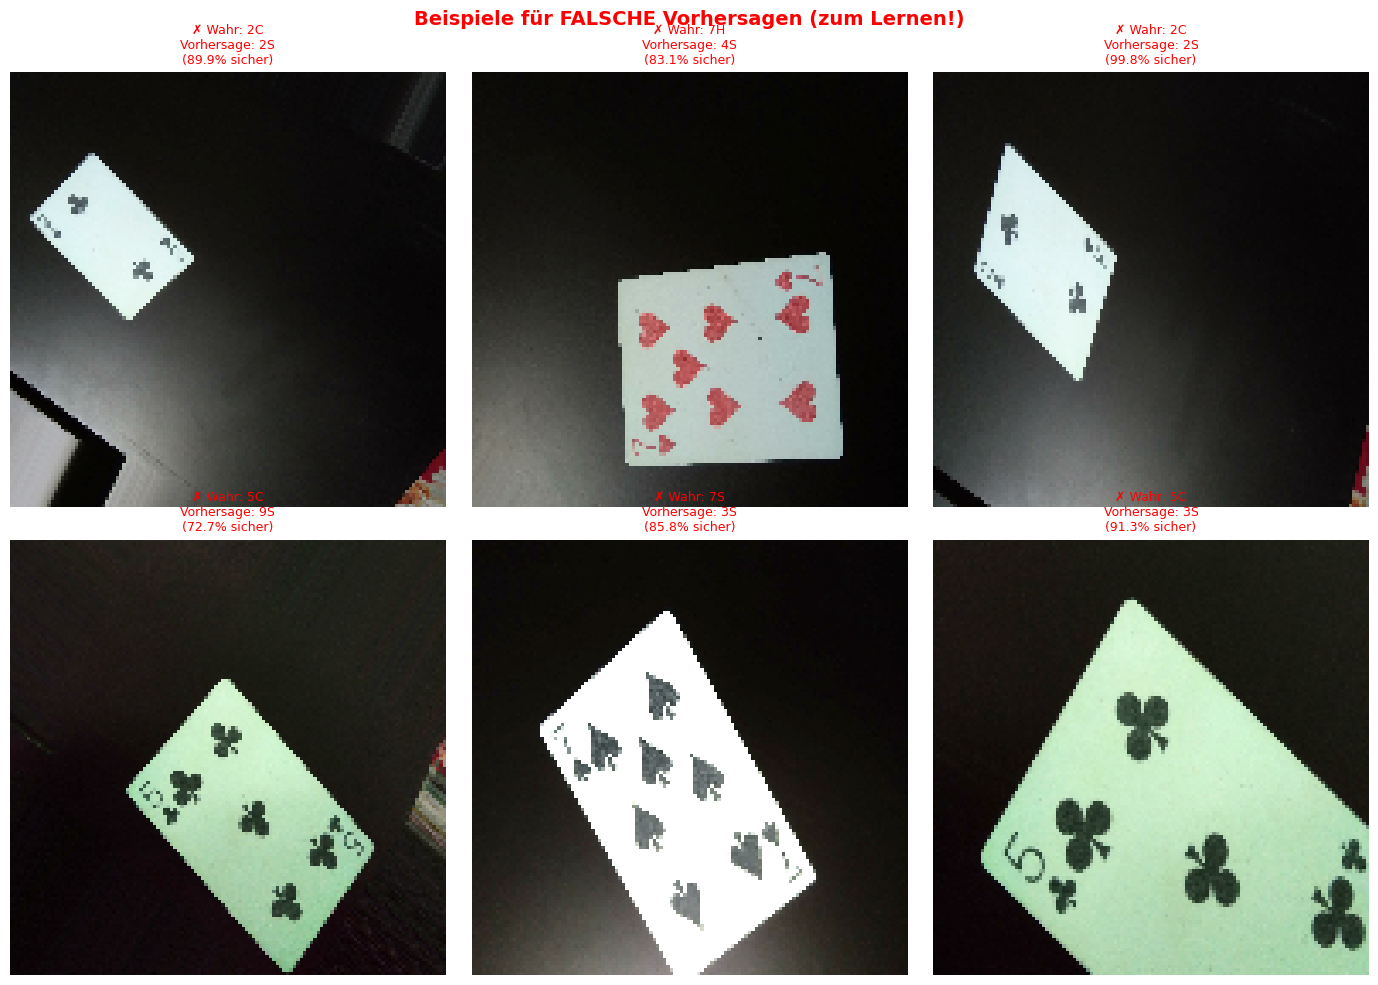


💡 ANALYSE: Warum macht das Modell diese Fehler?
------------------------------------------------------------
   Mögliche Gründe:
   - Ähnliche visuelle Merkmale bei verschiedenen Karten
   - Unterschiedliche Bildqualität oder Beleuchtung
   - Zu wenige Trainingsbeispiele für bestimmte Klassen
   - Das Modell braucht mehr Epochen zum Lernen


In [61]:
# ==============================================================================
# 9.1 FEHLGESCHLAGENE VORHERSAGEN ANALYSIEREN
# ==============================================================================
# Es ist besonders lehrreich, sich die Fehler anzuschauen.
# So verstehen wir, wo das Modell Schwierigkeiten hat.
# ==============================================================================

print("=" * 60)
print("ANALYSE DER FEHLGESCHLAGENEN VORHERSAGEN")
print("=" * 60)

# Finde Indizes, wo Vorhersage != wahres Label
fehler_indizes = np.where(y_pred != y_true)[0]

print(f"📊 Gesamtzahl der Fehler: {len(fehler_indizes)}")
print()

if len(fehler_indizes) > 0:
    # Einige Fehlerbeispiele sammeln
    fehler_beispiele = []
    
    for images, labels in val_dataset:
        for i, (img, label) in enumerate(zip(images, labels)):
            # Vorhersage
            pred = model.predict(np.expand_dims(img, 0), verbose=0)
            pred_label = np.argmax(pred)
            
            if pred_label != label.numpy() and len(fehler_beispiele) < 6:
                fehler_beispiele.append({
                    'bild': img.numpy(),
                    'wahr': class_names[label.numpy()],
                    'vorhergesagt': class_names[pred_label],
                    'konfidenz': np.max(pred) * 100
                })
        
        if len(fehler_beispiele) >= 6:
            break
    
    # Fehler visualisieren
    if fehler_beispiele:
        fig, axes = plt.subplots(2, 3, figsize=(14, 10))
        fig.suptitle('Beispiele für FALSCHE Vorhersagen (zum Lernen!)', 
                     fontsize=14, fontweight='bold', color='red')
        
        for idx, ax in enumerate(axes.flat):
            if idx < len(fehler_beispiele):
                f = fehler_beispiele[idx]
                ax.imshow(f['bild'].astype('uint8'))
                titel = f"✗ Wahr: {f['wahr']}\nVorhersage: {f['vorhergesagt']}\n({f['konfidenz']:.1f}% sicher)"
                ax.set_title(titel, fontsize=9, color='red')
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        print("\n💡 ANALYSE: Warum macht das Modell diese Fehler?")
        print("-" * 60)
        print("   Mögliche Gründe:")
        print("   - Ähnliche visuelle Merkmale bei verschiedenen Karten")
        print("   - Unterschiedliche Bildqualität oder Beleuchtung")
        print("   - Zu wenige Trainingsbeispiele für bestimmte Klassen")
        print("   - Das Modell braucht mehr Epochen zum Lernen")
else:
    print("🎉 Wow! Das Modell hat keine Fehler auf den Validierungsdaten gemacht!")

print("=" * 60)

## 10. Zusammenfassung und nächste Schritte

### Was haben wir gelernt?

In diesem Notebook haben wir:

1. **Ein CNN von Grund auf gebaut** mit:
   - Convolution Layers (Faltungsschichten) zur Merkmalserkennung
   - ReLU als Aktivierungsfunktion
   - MaxPooling zur Dimensionsreduktion
   - Dense Layers (vollverbundene Schichten) zur Klassifikation
   - Softmax für Wahrscheinlichkeiten

2. **Den Trainingsprozess verstanden:**
   - Forward Pass: Eingabe → Vorhersage
   - Loss-Berechnung: Wie falsch war die Vorhersage?
   - Backpropagation: Gradienten berechnen
   - Gewichtsanpassung: Modell verbessern

3. **Das Modell evaluiert:**
   - Accuracy als Hauptmetrik
   - Confusion Matrix zur Fehleranalyse
   - Visualisierung von Beispielvorhersagen

### Wie passt das zur Vorlesung?

| Vorlesungskonzept | Umsetzung im Code |
|-------------------|-------------------|
| Eingabeschicht | `input_shape=(128, 128, 3)` |
| Faltungsschicht (Convolution) | `Conv2D(32, (3,3), activation='relu')` |
| Detector Layer (ReLU) | `activation='relu'` |
| Pooling Layer | `MaxPooling2D((2, 2))` |
| Flatten | `Flatten()` |
| Hidden Layer (MLP) | `Dense(128, activation='relu')` |
| Output Layer | `Dense(num_classes, activation='softmax')` |
| Verlustfunktion | `sparse_categorical_crossentropy` |
| Optimierung | Adam (Gradientenabstieg mit Momentum) |
| Backpropagation | Automatisch durch `model.fit()` |

### Mögliche Verbesserungen

1. **Data Augmentation:** Bilder zufällig drehen, spiegeln, zoomen für mehr Trainingsdaten
2. **Transfer Learning:** Ein vortrainiertes Modell (z.B. VGG16, ResNet) als Basis verwenden
3. **Mehr Epochen:** Länger trainieren (mit Early Stopping gegen Overfitting)
4. **Hyperparameter-Tuning:** Verschiedene Lernraten, Filter-Anzahlen, etc. ausprobieren
5. **Batch Normalization:** Stabilisiert das Training bei tiefen Netzen

### Weitere Ressourcen

- [TensorFlow/Keras Dokumentation](https://www.tensorflow.org/guide/keras)
- [CS231n: CNN for Visual Recognition (Stanford)](http://cs231n.stanford.edu/)
- [Deep Learning Book (Goodfellow et al.)](https://www.deeplearningbook.org/)

In [23]:
# ==============================================================================
# 10. MODELL SPEICHERN (OPTIONAL)
# ==============================================================================
# Wenn du zufrieden mit deinem Modell bist, kannst du es speichern.
# So musst du nicht jedes Mal neu trainieren!
# ==============================================================================

print("=" * 60)
print("MODELL SPEICHERN")
print("=" * 60)

# Modell speichern
modell_pfad = "spielkarten_cnn_modell.keras"
model.save(modell_pfad)

print(f"✅ Modell gespeichert unter: {modell_pfad}")
print()
print("💡 Um das Modell später zu laden:")
print(f'   model = keras.models.load_model("{modell_pfad}")')
print("=" * 60)

# ==============================================================================
# ABSCHLUSS
# ==============================================================================
print()
print("🎉" + "=" * 58 + "🎉")
print("   HERZLICHEN GLÜCKWUNSCH!")
print("   Du hast dein erstes CNN erfolgreich trainiert!")
print("🎉" + "=" * 58 + "🎉")
print()
print("Was du gelernt hast:")
print("   ✅ Was ein Neuronales Netz ist")
print("   ✅ Was ein CNN ist und warum es für Bilder geeignet ist")
print("   ✅ Wie Convolution, Pooling und Dense Layers funktionieren")
print("   ✅ Wie man ein Modell trainiert und evaluiert")
print("   ✅ Wie man Ergebnisse interpretiert")
print()
print("Viel Erfolg bei deinen weiteren Deep-Learning-Projekten! 🚀")

MODELL SPEICHERN
✅ Modell gespeichert unter: spielkarten_cnn_modell.keras

💡 Um das Modell später zu laden:
   model = keras.models.load_model("spielkarten_cnn_modell.keras")

🎉==========================================================🎉
   HERZLICHEN GLÜCKWUNSCH!
   Du hast dein erstes CNN erfolgreich trainiert!
🎉==========================================================🎉

Was du gelernt hast:
   ✅ Was ein Neuronales Netz ist
   ✅ Was ein CNN ist und warum es für Bilder geeignet ist
   ✅ Wie Convolution, Pooling und Dense Layers funktionieren
   ✅ Wie man ein Modell trainiert und evaluiert
   ✅ Wie man Ergebnisse interpretiert

Viel Erfolg bei deinen weiteren Deep-Learning-Projekten! 🚀


## 11. Eigene Bilder testen 📸

Jetzt wird es spannend! Du kannst dein trainiertes Modell mit **eigenen Fotos** testen.

### So funktioniert's:

1. **Mache ein Foto** von einer Spielkarte mit deinem Handy oder Kamera
2. **Kopiere das Bild** in den Ordner `./data/input/`
3. **Führe die nächste Zelle aus** - das Modell wird alle Bilder im Ordner klassifizieren!

### Tipps für gute Ergebnisse:

| Tipp | Beschreibung |
|------|--------------|
| 📷 **Perspektive** | Fotografiere die Karte möglichst von oben |
| 💡 **Beleuchtung** | Gute, gleichmäßige Beleuchtung ohne starke Schatten |
| 🎯 **Bildausschnitt** | Die Karte sollte den Großteil des Bildes einnehmen |
| 🖼️ **Format** | Unterstützt: `.jpg`, `.jpeg`, `.png` |

### Hinweis:
Das Modell wurde mit Bildern trainiert, die eine bestimmte Perspektive haben. Bei sehr anderen Blickwinkeln oder Beleuchtungen kann die Genauigkeit sinken - das ist normal und zeigt die Grenzen des Trainings!

EIGENE BILDER TESTEN
📁 Input-Ordner: /Users/keanu.fuchs/Developer/computational-intelligence/data/input

📸 1 Bild(er) gefunden!

📷 original.jpg
   → Vorhersage: 3 of Clubs (Kreuz) (3C)
   → Konfidenz: 99.9%
   → Top 3 Kandidaten:
      1. 3 of Clubs (Kreuz) (3C): 99.9%
      2. Queen of Spades (Pik) (QS): 0.0%
      3. 7 of Spades (Pik) (7S): 0.0%



/var/folders/m7/7wvkhhbn7y970tkp7rk9ln2h0000gp/T/ipykernel_38410/1154974122.py:142: UserWarning: Glyph 128196 (\N{PAGE FACING UP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/m7/7wvkhhbn7y970tkp7rk9ln2h0000gp/T/ipykernel_38410/1154974122.py:142: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


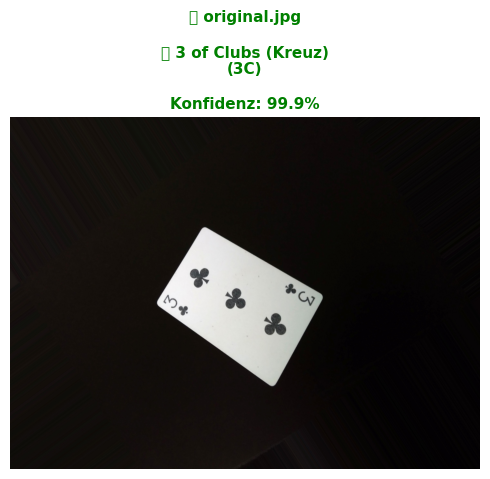

💡 INTERPRETATION DER ERGEBNISSE:
------------------------------------------------------------
   ✅ Grün (>70%):   Hohe Konfidenz - wahrscheinlich korrekt
   ⚠️  Orange (40-70%): Mittlere Konfidenz - unsicher
   ❓ Rot (<40%):    Niedrige Konfidenz - wahrscheinlich falsch

   Bei niedriger Konfidenz: Versuche ein besseres Foto!
   - Bessere Beleuchtung
   - Karte gerade/von oben fotografieren
   - Karte sollte Großteil des Bildes einnehmen


In [83]:
# ==============================================================================
# 11. EIGENE BILDER TESTEN
# ==============================================================================
# Mit dieser Funktion kannst du eigene Fotos von Spielkarten testen!
# Lege deine Bilder einfach in den Ordner ./data/input/ und führe diese Zelle aus.
#
# ANLEITUNG:
# 1. Mache ein Foto von einer Spielkarte
# 2. Kopiere das Bild nach ./data/input/
# 3. Führe diese Zelle aus
# 4. Das Modell zeigt dir seine Vorhersage!
# ==============================================================================

from PIL import Image

# --- Input-Ordner definieren und erstellen ---
INPUT_DIR = os.path.join(DATA_DIR, "input")
os.makedirs(INPUT_DIR, exist_ok=True)

def teste_eigene_bilder():
    """
    Lädt alle Bilder aus ./data/input/ und klassifiziert sie mit dem trainierten Modell.
    
    Diese Funktion:
    1. Sucht nach Bildern im Input-Ordner
    2. Lädt und skaliert jedes Bild auf 128x128 Pixel
    3. Lässt das trainierte CNN eine Vorhersage machen
    4. Zeigt das Bild mit der Vorhersage und Konfidenz an
    """
    print("=" * 60)
    print("EIGENE BILDER TESTEN")
    print("=" * 60)
    print(f"📁 Input-Ordner: {os.path.abspath(INPUT_DIR)}")
    print()
    
    # --- Alle Bilddateien im Input-Ordner finden ---
    erlaubte_endungen = ('.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG')
    
    if not os.path.exists(INPUT_DIR):
        os.makedirs(INPUT_DIR, exist_ok=True)
    
    bild_dateien = [f for f in os.listdir(INPUT_DIR) if f.endswith(erlaubte_endungen)]
    
    if not bild_dateien:
        print("⚠️  Keine Bilder gefunden!")
        print()
        print("📋 So testest du eigene Bilder:")
        print(f"   1. Öffne den Ordner: {os.path.abspath(INPUT_DIR)}")
        print("   2. Kopiere deine Spielkarten-Fotos hinein")
        print("   3. Führe diese Zelle erneut aus")
        print()
        print("💡 Unterstützte Formate: .jpg, .jpeg, .png")
        print("=" * 60)
        return
    
    print(f"📸 {len(bild_dateien)} Bild(er) gefunden!")
    print()
    
    # --- Anzahl der Spalten für die Anzeige berechnen ---
    anzahl_bilder = len(bild_dateien)
    spalten = min(3, anzahl_bilder)
    zeilen = (anzahl_bilder + spalten - 1) // spalten
    
    fig, axes = plt.subplots(zeilen, spalten, figsize=(5 * spalten, 6 * zeilen))
    
    # Axes-Array normalisieren (für konsistente Indexierung)
    if anzahl_bilder == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    # --- Jedes Bild laden, vorverarbeiten und klassifizieren ---
    for idx, dateiname in enumerate(bild_dateien):
        bild_pfad = os.path.join(INPUT_DIR, dateiname)
        
        try:
            # Bild laden und auf richtige Größe bringen
            bild = Image.open(bild_pfad)
            bild = bild.convert('RGB')  # Falls PNG mit Alpha-Kanal
            bild_resized = bild.resize((IMG_WIDTH, IMG_HEIGHT))
            
            # Zu NumPy-Array konvertieren und Batch-Dimension hinzufügen
            bild_array = np.array(bild_resized)
            bild_array = np.expand_dims(bild_array, axis=0)  # Shape: (1, 128, 128, 3)
            
            # Vorhersage machen
            vorhersage = model.predict(bild_array, verbose=0)
            vorhergesagte_klasse_idx = np.argmax(vorhersage[0])
            vorhergesagte_klasse = class_names[vorhergesagte_klasse_idx]
            konfidenz = vorhersage[0][vorhergesagte_klasse_idx] * 100
            
            # Klassenname in lesbaren Namen umwandeln
            lesbarer_name = klasse_zu_name(vorhergesagte_klasse)
            
            # Bild anzeigen (Originalgröße)
            ax = axes[idx]
            ax.imshow(bild)
            ax.axis('off')
            
            # Farbe basierend auf Konfidenz
            if konfidenz > 70:
                farbe = 'green'
                symbol = '✅'
            elif konfidenz > 40:
                farbe = 'orange'
                symbol = '⚠️'
            else:
                farbe = 'red'
                symbol = '❓'
            
            # Titel mit Vorhersage
            ax.set_title(
                f"📄 {dateiname}\n\n"
                f"{symbol} {lesbarer_name}\n"
                f"({vorhergesagte_klasse})\n\n"
                f"Konfidenz: {konfidenz:.1f}%", 
                fontsize=11, color=farbe, fontweight='bold'
            )
            
            # Details in Konsole ausgeben
            print(f"📷 {dateiname}")
            print(f"   → Vorhersage: {lesbarer_name} ({vorhergesagte_klasse})")
            print(f"   → Konfidenz: {konfidenz:.1f}%")
            
            # Top 3 Vorhersagen anzeigen
            top3_idx = np.argsort(vorhersage[0])[-3:][::-1]
            print("   → Top 3 Kandidaten:")
            for i, klassen_idx in enumerate(top3_idx):
                k = class_names[klassen_idx]
                p = vorhersage[0][klassen_idx] * 100
                print(f"      {i+1}. {klasse_zu_name(k)} ({k}): {p:.1f}%")
            print()
            
        except Exception as e:
            print(f"❌ Fehler beim Laden von {dateiname}: {e}")
            axes[idx].text(0.5, 0.5, f"Fehler:\n{e}", ha='center', va='center')
            axes[idx].axis('off')
    
    # Leere Subplots ausblenden
    for idx in range(len(bild_dateien), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("=" * 60)
    print("💡 INTERPRETATION DER ERGEBNISSE:")
    print("-" * 60)
    print("   ✅ Grün (>70%):   Hohe Konfidenz - wahrscheinlich korrekt")
    print("   ⚠️  Orange (40-70%): Mittlere Konfidenz - unsicher")
    print("   ❓ Rot (<40%):    Niedrige Konfidenz - wahrscheinlich falsch")
    print()
    print("   Bei niedriger Konfidenz: Versuche ein besseres Foto!")
    print("   - Bessere Beleuchtung")
    print("   - Karte gerade/von oben fotografieren")
    print("   - Karte sollte Großteil des Bildes einnehmen")
    print("=" * 60)

# --- Funktion ausführen ---
teste_eigene_bilder()